The Greate Year in Films: An Analysis

Films are a passion of mine and I would like to analyze what was the single greatest year in film.
I will download the dataset from IMDB primarily and use their ratings as a first source of truth.

My goal is to see which results I get based on different buckets for a certain year.For example first I am gonna look at the top 5 rated movies per year.
I will also check buckets of 3,7 and 10 movies.

I will only include full movies,not tv movies or short.I will have to also decide on what is the cutoff for number of votes since I dont want to include movies with a relativaly low number which will skew the data 

After I have performed all this I will see and include some other ratings from different sources and compare them


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#import IMDB ratings table
df = pd.read_csv('../title.ratings.tsv',sep='\t')
df

,tconst,averageRating,numVotes
0,tt0000001,5.7,2104
1,tt0000002,5.6,282
2,tt0000003,6.5,2123
3,tt0000004,5.4,182
4,tt0000005,6.2,2852
...,...,...,...
1503477,tt9916730,7.0,12
1503478,tt9916766,7.1,24
1503479,tt9916778,7.2,37
1503480,tt9916840,6.9,11


In [10]:
#import IMDB Title table
df_title = pd.read_csv('../title.basics.tsv',sep='\t')
df_title

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_43665/586595804.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title = pd.read_csv('../title.basics.tsv',sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
11261930,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
11261931,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
11261932,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
11261933,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [16]:
df_title['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [20]:
#only include movies from types

df_just_movie = df_title[df_title['titleType']=='movie']

In [22]:
#merged the ratings and movies table
df_merged = pd.merge(df_just_movie,df,on='tconst',how='inner')
df_merged

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,215
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,539
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.4,18
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,941
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.7,28
...,...,...,...,...,...,...,...,...,...,...,...
320706,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,5941
320707,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.6,19
320708,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,8.3,9
320709,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,7.7,9


In [70]:
#check top 20/40 movies depending on votes and see if any movies pop up
#Try and establish some cutoff point

df_merged[df_merged['numVotes']>45000].sort_values(by='averageRating',ascending=False).head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
62466,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2967074
37498,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,2069237
60890,tt0108052,movie,Schindler's List,Schindler's List,0,1993,\N,195,"Biography,Drama,History",9.0,1487857
80003,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",9.0,2031192
24394,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,"Crime,Drama",9.0,894778
39417,tt0071562,movie,The Godfather Part II,The Godfather Part II,0,1974,\N,202,"Crime,Drama",9.0,1397234
139491,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2948574
62319,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2278118
67155,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.9,2060764
232880,tt23849204,movie,12th Fail,12th Fail,0,2023,\N,147,"Biography,Drama",8.8,134765


In [89]:
#first check results with a cutoff of votes 10000 or more
#I will change the cutoff point if the results seems troublesome
df_merged_final = df_merged[df_merged['numVotes']>9999]

In [91]:
len(df_merged_final)

11476

In [93]:
#check how many documentaries are withing this range and should they be included
df_merged_final[df_merged_final['genres'].str.contains('Documentary')].sort_values(by='averageRating',ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
202982,tt16747572,movie,The Silence of Swastika,The Silence of Swastika,0,2021,\N,56,"Documentary,History",9.1,10582
283164,tt5275892,movie,O.J.: Made in America,O.J.: Made in America,0,2016,\N,467,"Biography,Crime,Documentary",8.9,22698
50742,tt0090015,movie,Shoah,Shoah,0,1985,\N,566,"Documentary,History,War",8.7,10821
49681,tt0088178,movie,Stop Making Sense,Stop Making Sense,0,1984,\N,88,"Documentary,Music",8.7,21800
124230,tt0358456,movie,Earthlings,Earthlings,0,2005,\N,95,Documentary,8.6,20000
...,...,...,...,...,...,...,...,...,...,...,...
158334,tt1091617,movie,Expelled: No Intelligence Allowed,Expelled: No Intelligence Allowed,0,2008,\N,90,Documentary,3.7,12221
161512,tt1127884,movie,Hannah Montana and Miley Cyrus: Best of Both W...,Hannah Montana and Miley Cyrus: Best of Both W...,0,2008,\N,74,"Documentary,Music",2.7,12209
204169,tt1702443,movie,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,0,2011,\N,105,"Documentary,Music",1.7,76489
255080,tt3165608,movie,Justin Bieber's Believe,Justin Bieber's Believe,0,2013,\N,92,"Documentary,Music",1.6,17940


In [95]:
#this is a really small number considering it is a specific genre
#I will keep it in the sample
len(df_merged_final[df_merged_final['genres'].str.contains('Documentary')])

253

In [115]:
#now we should group movies per year and get average rating of the highest 5

#first sort the df by year and rating
df_sorted = df_merged_final.sort_values(['startYear', 'averageRating'], ascending=[True, False])
#then get top 5 per year
top_5_per_year = df_sorted.groupby('startYear').head(5)
top_5_per_year

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
314,tt0004972,movie,The Birth of a Nation,The Birth of a Nation,0,1915,\N,195,"Drama,War",6.1,26892
606,tt0006864,movie,Intolerance,Intolerance: Love's Struggle Throughout the Ages,0,1916,\N,163,"Drama,History",7.7,17084
1239,tt0009968,movie,Broken Blossoms,Broken Blossoms or The Yellow Man and the Girl,0,1919,\N,90,"Drama,Romance",7.2,11297
1328,tt0010323,movie,The Cabinet of Dr. Caligari,Das Cabinet des Dr. Caligari,0,1920,\N,67,"Horror,Mystery,Thriller",8.0,72054
1814,tt0012349,movie,The Kid,The Kid,0,1921,\N,68,"Comedy,Drama,Family",8.2,137986
...,...,...,...,...,...,...,...,...,...,...,...
193487,tt15239678,movie,Dune: Part Two,Dune: Part Two,0,2024,\N,166,"Action,Adventure,Drama",8.5,547874
239409,tt26548265,movie,Maharaja,Maharaja,0,2024,\N,141,"Action,Crime,Drama",8.5,53766
171786,tt1262426,movie,Wicked,Wicked: Part I,0,2024,\N,160,"Fantasy,Musical,Romance",8.3,13928
249644,tt29623480,movie,The Wild Robot,The Wild Robot,0,2024,\N,102,"Animation,Sci-Fi",8.3,83265


In [155]:
#now group per year and get count of movies which are used for the average rating
grouped_df = top_5_per_year.groupby('startYear').agg(
    movies_included_count=('averageRating', 'count'),
    avg_rating=('averageRating', lambda x: round(x.mean(), 3)),
    movie_names=('primaryTitle', lambda x: ','.join(x))    
)
grouped_df.reset_index(inplace=True)

,startYear,movies_included_count,avg_rating,movie_names


In [167]:
grouped_df[grouped_df['startYear']=='2022'].values

array([['2022', 5, 8.66,
        'Daman,777 Charlie,Rocketry: The Nambi Effect,The Kashmir Files,The Legend of Maula Jatt']],
      dtype=object)

In [169]:
grouped_df[grouped_df['startYear']=='2023'].values

array([['2023', 5, 8.58,
        '12th Fail,Kaiva,Spider-Man: Across the Spider-Verse,20 Days in Mariupol,Lost Ladies']],
      dtype=object)

In [171]:
grouped_df[grouped_df['startYear']=='2021'].values

array([['2021', 5, 8.82,
        'The Silence of Swastika,#Home,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansion Arc,Jai Bhim,Toma']],
      dtype=object)

In [ ]:
#looking at some of these examples it seems we need to raise the limit to 20k votes atleast
#also worth considering a lot of these movies are Indian and they get a lot of votes,maybe they should be excluded

In [175]:
#perform all the same actions as before for sorting and grouping
#use 20k as cutoff point this time
df_merged_final = df_merged[df_merged['numVotes']>19999]
df_sorted = df_merged_final.sort_values(['startYear', 'averageRating'], ascending=[True, False])
top_5_per_year = df_sorted.groupby('startYear').head(5)
grouped_df = top_5_per_year.groupby('startYear').agg(
    movies_included_count=('averageRating', 'count'),
    avg_rating=('averageRating', lambda x: round(x.mean(), 3)),
    movie_names=('primaryTitle', lambda x: ','.join(x))    
)
grouped_df.reset_index(inplace=True)

In [187]:
grouped_df.shape

(106, 4)

In [179]:
grouped_df[grouped_df['startYear']=='2021'].values

array([['2021', 5, 8.54,
        'Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansion Arc,Jai Bhim,Sarpatta Parambarai,Drishyam 2,Sardar Udham']],
      dtype=object)

In [189]:
#we should first exclude all the movies that dont have 5 movies for the year
#since we are only look at 5 movie bins first
grouped_df = grouped_df[grouped_df['movies_included_count'] > 4]
grouped_df

,startYear,movies_included_count,avg_rating,movie_names
12,1931,5,7.92,"City Lights,M,Frankenstein,The Public Enemy,Dr..."
13,1932,5,7.44,"Freaks,Scarface,Vampyr,Grand Hotel,The Mummy"
16,1935,5,7.70,"Bride of Frankenstein,A Night at the Opera,Top..."
19,1938,5,7.82,"The Adventures of Robin Hood,Angels with Dirty..."
20,1939,5,8.02,"Gone with the Wind,Mr. Smith Goes to Washingto..."
...,...,...,...,...
101,2020,5,8.34,"Soorarai Pottru,Dil Bechara,Hamilton,The Fathe..."
102,2021,5,8.54,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...
103,2022,5,8.56,"777 Charlie,Rocketry: The Nambi Effect,The Kas..."
104,2023,5,8.58,"12th Fail,Kaiva,Spider-Man: Across the Spider-..."


In [195]:
#we will need to include another table from imdb,so we can filter out indian movies
df_region = pd.read_csv('../title.akas.tsv',sep='\t')
df_region

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
50483196,tt9916852,7,エピソード #3.20,JP,ja,\N,\N,0
50483197,tt9916852,8,Episodio #3.20,ES,es,\N,\N,0
50483198,tt9916856,1,The Wind,\N,\N,original,\N,1
50483199,tt9916856,2,The Wind,DE,\N,imdbDisplay,\N,0


In [209]:
df_region[df_region['language']=='id']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
122463,tt0024593,17,Anakja King Kong,ID,id,alternative,\N,0
190288,tt0032910,38,Pinokio,ID,id,imdbDisplay,\N,0
377659,tt0051467,22,Jalan Kembali,ID,id,imdbDisplay,\N,0
415410,tt0054780,32,Perangkap Iblis,ID,id,imdbDisplay,\N,0
421265,tt0055309,12,Sebuah Tarian di Tengah Hujan,ID,id,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
49725675,tt9590254,2,Jokowi Adalah Kita,ID,id,imdbDisplay,\N,0
50105469,tt9749558,28,Si Kukuk,ID,id,imdbDisplay,\N,0
50269163,tt9817980,28,Kekasih Domestik,ID,id,imdbDisplay,\N,0
50347088,tt9854932,9,Pinkfong Wonderstar,ID,id,imdbDisplay,\N,0


In [229]:
len(df_region[df_region['region'] =='IN'])

4895126

In [231]:
df_region[df_region['titleId']=='tt0032910']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
190257,tt0032910,1,Pinocchio,\N,\N,original,\N,1
190258,tt0032910,10,Pinocchio,EG,en,imdbDisplay,\N,0
190259,tt0032910,11,Pinocchio,FI,\N,\N,\N,0
190260,tt0032910,12,Pinocchio,FI,sv,imdbDisplay,\N,0
190261,tt0032910,13,Pinocchio,FR,\N,\N,reissue title,0
...,...,...,...,...,...,...,...,...
190314,tt0032910,61,ピノキオ（1940）,JP,ja,imdbDisplay,\N,0
190315,tt0032910,62,木偶奇遇記,TW,\N,imdbDisplay,\N,0
190316,tt0032910,7,Pinocchio,CZ,\N,imdbDisplay,\N,0
190317,tt0032910,8,Pinocchio,DE,\N,\N,\N,0


In [233]:
#looking at the data IMDB doesn't provide an option to target country origin of film
#as seen above the region and language columns providen no help for this

In [241]:
#I will implement MovieLens dataset and try and identify indian movies based on tags like bollywood
df_movielens_tags = pd.read_csv('../ml-32m/tags.csv')
df_movielens_tags

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [263]:
unique_tags = df_movielens_tags['tag'].unique()
len(unique_tags)

140980

In [277]:
#It seems I cannot use tags at all to differentiate this

In [279]:
#I will find a list of all the famous indian directors and try and exclude the movies that way

In [281]:
#implement the IMDB dataset which contains director names
df_crew = pd.read_csv('../title.crew.tsv',sep='\t')
df_crew.head(5)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [285]:
names = pd.read_csv('../name.basics.tsv', sep='\t', low_memory=False)
names.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [297]:
names.dropna(subset='primaryName',inplace=True)
names[names['primaryName'].str.contains('Jayathirtha')]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
5239538,nm14668207,Jayathirtha Jayanna,\N,\N,director,tt27191186
13940681,nm9955426,Jayathirtha,\N,\N,"director,writer","tt9430780,tt27719898,tt15768294,tt8665760"


In [301]:
df_crew.drop(columns='writers',inplace=True)
df_crew.rename(columns={"directors": "nconst"},inplace=True)

In [307]:
df_names = names[['nconst','primaryName']]

In [309]:
#here we finally get the film id together with the directors name
df_names_crew = pd.merge(df_crew,df_names,on='nconst',how='inner')
df_names_crew.drop(columns='nconst',inplace=True)

,tconst,nconst,primaryName
0,tt0000001,nm0005690,William K.L. Dickson
1,tt0000002,nm0721526,Émile Reynaud
2,tt0000003,nm0721526,Émile Reynaud
3,tt0000004,nm0721526,Émile Reynaud
4,tt0000005,nm0005690,William K.L. Dickson
...,...,...,...
5261519,tt9916848,nm1485677,Hamdi Alkan
5261520,tt9916850,nm1485677,Hamdi Alkan
5261521,tt9916852,nm1485677,Hamdi Alkan
5261522,tt9916856,nm10538645,Johan Planefeldt


In [317]:
#merge the dataframe we use with the directors
df_final = pd.merge(df_merged_final,df_names_crew,on='tconst',how='inner')
df_final.sort_values('averageRating',ascending=False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,primaryName
1565,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2967074,Frank Darabont
427,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,2069237,Francis Ford Coppola
2432,tt0252487,movie,The Chaos Class,Hababam Sinifi,0,1975,\N,85,Comedy,9.2,43728,Ertem Egilmez
1458,tt0108052,movie,Schindler's List,Schindler's List,0,1993,\N,195,"Biography,Drama,History",9.0,1487857,Steven Spielberg
482,tt0071562,movie,The Godfather Part II,The Godfather Part II,0,1974,\N,202,"Crime,Drama",9.0,1397234,Francis Ford Coppola
2180,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",9.0,2031192,Peter Jackson
3475,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2948574,Christopher Nolan
180,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,"Crime,Drama",9.0,894778,Sidney Lumet
6473,tt5354160,movie,Mirror Game,Aynabaji,0,2016,\N,147,"Crime,Mystery,Thriller",8.9,30129,Amitabh Reza Chowdhury
2442,tt0253828,movie,Tosun Pasha,Tosun Pasa,0,1976,\N,90,"Comedy,History",8.9,25113,Kartal Tibet


In [342]:
#load the indian directors into a list
indian_directors = open("indian_directors",'r').read().split('\n')

In [362]:
df_final[df_final['tconst'] == 'tt5354160']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,primaryName,indian_dir
6473,tt5354160,movie,Mirror Game,Aynabaji,0,2016,\N,147,"Crime,Mystery,Thriller",8.9,30129,Amitabh Reza Chowdhury,True


In [350]:
#create function to exclude indian directors if they are found in the list we loaded previously
def made_by_indian_director(name):
    if name in indian_directors:
        return True
    else:
        return False

In [389]:
df_final['indian_dir']= df_final['primaryName'].apply(made_by_indian_director)

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_43665/2644904333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['indian_dir']= df_final['primaryName'].apply(made_by_indian_director)


In [391]:
df_final['indian_dir'].value_counts()

indian_dir
False    7001
True        2
Name: count, dtype: int64

In [409]:
df_final = df_final[df_final['indian_dir']== False]

In [467]:
#do the same for a list of the most famous films in india
indian_films = open("indian_films",'r').read().split('\n')
def indian_film(name):
    if name in indian_films:
        return True
    else:
        return False
df_final['indian_film']= df_final['primaryTitle'].apply(indian_film)
df_final = df_final[df_final['indian_film']== False]

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_43665/2185407219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['indian_film']= df_final['primaryTitle'].apply(indian_film)


In [419]:
len(indian_films)

122

In [435]:
#import dataset of bollywood imdb movies 
#extract the imdb ids
df_bollywood_data = pd.read_csv('../IMDB-Movie-Dataset(2023-1951).csv')
bollywood_ids = df_bollywood_data['movie_id'].to_list()
def indian_id(name):
    if name in bollywood_ids:
        return True
    else:
        return False
df_final['indian_id']= df_final['tconst'].apply(indian_id)

In [443]:
df_final['indian_id'].value_counts()

indian_id
False    6769
True      220
Name: count, dtype: int64

In [445]:
df_final = df_final[df_final['indian_id']== False]

In [1352]:
#rerun the grouping and sorting
#write function so I can immediately get the dataframes for the 4 bins I have decided on
#just need to input the df,name of year,rating and title column

def process_multiple_top_per_year(df, year_col, rating_col, title_col):
    #in this analysis we will always have the same bins
    bins = [3, 5, 7, 10]  
    results = {}

    #like before sort by year and rating
    df_sorted = df.sort_values([year_col, rating_col], ascending=[True, False])

    for top_n in bins:
        #group by year and take the according bin number
        top_per_year = df_sorted.groupby(year_col).head(top_n)

        aggregated = top_per_year.groupby(year_col).agg(
            movies_included_count=(rating_col, 'count'),
            avg_rating=(rating_col, lambda x: round(x.mean(), 3)),
            movie_names=(title_col, lambda x: ','.join(x))
        )

        #filter by minimum movies, example for 3 movie bin its > 2
        min_movies_included = top_n - 1 
        aggregated.reset_index(inplace=True)
        aggregated = aggregated[aggregated['movies_included_count'] > min_movies_included]

        aggregated = aggregated.sort_values('avg_rating', ascending=False)

        #add to dictionary
        results[top_n] = aggregated

    return results
results = process_multiple_top_per_year(
    df_final,
    'startYear',
    'averageRating',
    'primaryTitle'
)

#get results for each bin
imdb3 = results[3]
imdb5 = results[5]
imdb7 = results[7]
imdb10 = results[10]

In [1360]:
#merge all the dfs together for all the buckets
merged_df = pd.merge(
    imdb5.sort_values('avg_rating', ascending=False),
    imdb3.sort_values('avg_rating', ascending=False),
    on='startYear',
    how='inner',
    suffixes=('_grouped', '_grouped3')
)
merged_df = pd.merge(
    merged_df,
    imdb7.sort_values('avg_rating', ascending=False),
    on='startYear',
    how='inner',
    suffixes=('_merged1', '_grouped7')
)

merged_all_imdb = pd.merge(
    merged_df,
    imdb10.sort_values('avg_rating', ascending=False),
    on='startYear',
    how='inner',
    suffixes=('_merged2', '_grouped10')
)

merged_all_imdb

,startYear,movies_included_count_grouped,avg_rating_grouped,movie_names_grouped,movies_included_count_grouped3,avg_rating_grouped3,movie_names_grouped3,movies_included_count_merged2,avg_rating_merged2,movie_names_merged2,movies_included_count_grouped10,avg_rating_grouped10,movie_names_grouped10
0,1994,5,8.76,"The Shawshank Redemption,Pulp Fiction,Forrest ...",3,9.000,"The Shawshank Redemption,Pulp Fiction,Forrest ...",7,8.600,"The Shawshank Redemption,Pulp Fiction,Forrest ...",10,8.41,"The Shawshank Redemption,Pulp Fiction,Forrest ..."
1,1957,5,8.44,"12 Angry Men,Paths of Glory,Witness for the Pr...",3,8.600,"12 Angry Men,Paths of Glory,Witness for the Pr...",7,8.343,"12 Angry Men,Paths of Glory,Witness for the Pr...",10,8.25,"12 Angry Men,Paths of Glory,Witness for the Pr..."
2,2003,5,8.42,"The Lord of the Rings: The Return of the King,...",3,8.600,"The Lord of the Rings: The Return of the King,...",7,8.329,"The Lord of the Rings: The Return of the King,...",10,8.23,"The Lord of the Rings: The Return of the King,..."
3,2010,5,8.42,"Inception,Senna,Toy Story 3,Incendies,Shutter ...",3,8.533,"Inception,Senna,Toy Story 3",7,8.329,"Inception,Senna,Toy Story 3,Incendies,Shutter ...",10,8.22,"Inception,Senna,Toy Story 3,Incendies,Shutter ..."
4,1999,5,8.40,"Fight Club,The Green Mile,American Beauty,The ...",3,8.567,"Fight Club,The Green Mile,American Beauty",7,8.286,"Fight Club,The Green Mile,American Beauty,The ...",10,8.14,"Fight Club,The Green Mile,American Beauty,The ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1989,5,7.96,"Indiana Jones and the Last Crusade,Dead Poets ...",3,8.067,"Indiana Jones and the Last Crusade,Dead Poets ...",7,7.914,"Indiana Jones and the Last Crusade,Dead Poets ...",10,7.86,"Indiana Jones and the Last Crusade,Dead Poets ..."
68,1955,5,7.94,"Diabolique,Rififi,The Night of the Hunter,East...",3,8.067,"Diabolique,Rififi,The Night of the Hunter",7,7.857,"Diabolique,Rififi,The Night of the Hunter,East...",10,7.75,"Diabolique,Rififi,The Night of the Hunter,East..."
69,1981,5,7.94,"Das Boot,Indiana Jones and the Raiders of the ...",3,8.167,"Das Boot,Indiana Jones and the Raiders of the ...",7,7.814,"Das Boot,Indiana Jones and the Raiders of the ...",10,7.69,"Das Boot,Indiana Jones and the Raiders of the ..."
70,1956,5,7.90,"A Man Escaped,The Killing,The Ten Commandments...",3,8.000,"A Man Escaped,The Killing,The Ten Commandments",7,7.800,"A Man Escaped,The Killing,The Ten Commandments...",10,7.68,"A Man Escaped,The Killing,The Ten Commandments..."


In [110]:
#now calculate the average rating across all 4 bins
avg_rating_columns = merged_all_imdb.filter(like='avg_rating')
merged_all_imdb['average_all_4_bins'] = avg_rating_columns.mean(axis=1)
merged_all_imdb[['startYear','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,startYear,average_all_4_bins
0,1994,8.69250
1,1975,8.56250
2,1976,8.49350
3,1957,8.40825
4,2003,8.39475


In [124]:
merged_all_imdb[['startYear','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,startYear,average_all_4_bins
0,1994,8.69250
1,1975,8.56250
2,1976,8.49350
3,1957,8.40825
4,2003,8.39475


In [120]:
imdb_final = merged_all_imdb[['startYear','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False)

Here are the best 5 years of movies according to IMDB ratings.
According to IMDB ratings it definitely seems like 1994 is the best year in films.
Here is a list of 10 best movies for that year:

The Shawshank Redemption,Pulp Fiction,Forrest Gump,Léon: The Professional,Hoop Dreams,To Live,Three Colors: Red,Chungking Express,Crumb,Once Were Warriors

Now we should look at other sources and compare their rating to IMDB ratings

In [854]:
#Lets take a look at the letterboxd dataset of ~950k films and see their top years in films
#load the file
letter_input = pd.read_csv('../movies.csv')
letter_input.head(5)

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


In [858]:
len(letter_input)

941597

In [868]:
letter_input.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [874]:
#lets check the highest rated movies by letterboxed
letter_input.sort_values('rating',ascending=False).head(20)

,id,name,date,tagline,description,minute,rating
863,1000864,Harakiri,1962.0,The world has never understood why the Japanes...,Down-on-his-luck veteran Tsugumo Hanshirō ente...,135.0,4.69
1982,1001983,Band of Brothers,2001.0,There was a time when the world asked ordinary...,Drawn from interviews with survivors of Easy C...,594.0,4.69
1236,1001237,Stop Making Sense,1984.0,Why stop making sense? Why a movie? Why a big ...,A concert film documenting Talking Heads at th...,88.0,4.68
4267,1004268,Radiohead: In Rainbows – From the Basement,2008.0,What are you doing with that bottle?,A live performance by Radiohead of their 2007 ...,63.0,4.66
3376,1003377,Fullmetal Alchemist: Brotherhood,2009.0,NaN,Edward and Alphonse Elric's reckless disregard...,1656.0,4.65
1635,1001636,Cowboy Bebop,1998.0,See You Space Cowboy,"In 2071, roughly fifty years after an accident...",625.0,4.65
3223,1003224,No Half Measures: Creating the Final Season of...,2013.0,NaN,A documentary about the making of season five ...,135.0,4.65
3447,1003448,Monster,2004.0,NaN,"Kenzou Tenma, a Japanese brain surgeon in Germ...",1800.0,4.64
431,1000432,Come and See,1985.0,NaN,The invasion of a village in Byelorussia by Ge...,142.0,4.64
238,1000239,12 Angry Men,1957.0,Life is in their hands. Death is on their minds.,The defense and the prosecution have rested an...,97.0,4.62


In [886]:
#it seems like we have a lot of tv shows included here
#we should sort by minute and see if we can exclude them by minute column
#first drop all the rows with empty rating column
letter_input.dropna(subset='rating',inplace=True)
letter_input.sort_values('minute',ascending=False).head(20)

,id,name,date,tagline,description,minute,rating
27643,1027644,Logistics,2011.0,NaN,Logistics or Logistics Art Project is an exper...,51420.0,3.28
125151,1125152,Bandits,2014.0,NaN,Kandemir is the head of a gang which conducts ...,4485.0,3.47
51027,1051028,Jewel in the Palace,2003.0,NaN,Orphaned Jang-geum becomes the first female ph...,4320.0,3.87
52731,1052732,#ALLMYMOVIES,2015.0,NaN,Shia LaBeouf watches all his movies in reverse...,4320.0,3.64
111229,1111230,Shards of Her,2022.0,NaN,"Waking up from a coma, an accomplished headhun...",3771.0,3.52
97175,1097176,Special Case,2024.0,NaN,"As Nadim Abu Saree, who has exceptional abilit...",3750.0,3.41
108794,1108795,Katarsis,2023.0,NaN,Tara is the only witness of the massacre of he...,3272.0,3.56
97803,1097804,Story of Yanxi Palace,2018.0,NaN,The smart and witty Wei Yingluo enters the pal...,3150.0,3.61
56096,1056097,Empress Ki,2013.0,NaN,A woman born in Korea navigates her way throug...,3060.0,3.69
73159,1073160,Six Flying Dragons,2015.0,NaN,The ambitious success stories of 6 people surr...,3000.0,3.74


In [900]:
#it seems we can remove tv shows based on minute column
#for the length of the movie it should be from 60 minutes to 4 hours
letter_input[(letter_input['minute'] > 59) & (letter_input['minute'] < 241)].sort_values('rating',ascending=False).head(10)

,id,name,date,tagline,description,minute,rating
863,1000864,Harakiri,1962.0,The world has never understood why the Japanes...,Down-on-his-luck veteran Tsugumo Hanshirō ente...,135.0,4.69
1236,1001237,Stop Making Sense,1984.0,Why stop making sense? Why a movie? Why a big ...,A concert film documenting Talking Heads at th...,88.0,4.68
4267,1004268,Radiohead: In Rainbows – From the Basement,2008.0,What are you doing with that bottle?,A live performance by Radiohead of their 2007 ...,63.0,4.66
3223,1003224,No Half Measures: Creating the Final Season of...,2013.0,NaN,A documentary about the making of season five ...,135.0,4.65
431,1000432,Come and See,1985.0,NaN,The invasion of a village in Byelorussia by Ge...,142.0,4.64
238,1000239,12 Angry Men,1957.0,Life is in their hands. Death is on their minds.,The defense and the prosecution have rested an...,97.0,4.62
951,1000952,Over the Garden Wall,2014.0,Will you take a peek?,"Two brothers, Wirt and Greg, find themselves l...",109.0,4.61
2021,1002022,National Theatre Live: Fleabag,2019.0,NaN,"Fleabag may seem oversexed, emotionally unfilt...",81.0,4.60
535,1000536,Seven Samurai,1954.0,The Mighty Warriors Who Became the Seven Natio...,A samurai answers a village's request for prot...,207.0,4.60
1244,1001245,Twin Peaks,1989.0,Who killed Laura Palmer?,An idiosyncratic FBI agent investigates the mu...,116.0,4.60


In [912]:
letter_input = letter_input[(letter_input['minute'] > 59) & (letter_input['minute'] < 241)]

In [914]:
len(letter_input)

73079

In [928]:
#looking at the ratings we can see we have a lot of concert films with high ratings
#i think we should remove those if possible
#lets check the genres for a couple of those and see if we can remove those live concerts
#load the data
genres_input = pd.read_csv('../genres.csv')
genres_input.head(5)


,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama


In [942]:
#check for example the radiohead concert and see the tags
genres_input[genres_input['id'] == 1004268]

,id,genre
10930,1004268,Documentary
10931,1004268,Music


In [949]:
#group them by id and separate genres by comma
genres_grouped = genres_input.groupby('id').agg(
    genre=('genre',lambda x: ','.join(x)))

In [956]:
#number of documentaries in dataset
genres_grouped[genres_grouped['genre'].str.contains('Documentary')]

,genre
id,
1001237,"Music,Documentary"
1001363,"Documentary,Comedy"
1001524,Documentary
1001652,"Music,Documentary"
1001681,"Adventure,Documentary"
...,...
1941508,Documentary
1941515,Documentary
1941521,Documentary


In [962]:
#merge with main letterbox input
letter_final = pd.merge(letter_input,genres_grouped,on='id',how='inner')
letter_final.sort_values('rating',ascending=False).head(10)

,id,name,date,tagline,description,minute,rating,genre
855,1000864,Harakiri,1962.0,The world has never understood why the Japanes...,Down-on-his-luck veteran Tsugumo Hanshirō ente...,135.0,4.69,"History,Drama,Action"
1220,1001237,Stop Making Sense,1984.0,Why stop making sense? Why a movie? Why a big ...,A concert film documenting Talking Heads at th...,88.0,4.68,"Music,Documentary"
4141,1004268,Radiohead: In Rainbows – From the Basement,2008.0,What are you doing with that bottle?,A live performance by Radiohead of their 2007 ...,63.0,4.66,"Documentary,Music"
3147,1003224,No Half Measures: Creating the Final Season of...,2013.0,NaN,A documentary about the making of season five ...,135.0,4.65,Documentary
430,1000432,Come and See,1985.0,NaN,The invasion of a village in Byelorussia by Ge...,142.0,4.64,"War,Drama"
238,1000239,12 Angry Men,1957.0,Life is in their hands. Death is on their minds.,The defense and the prosecution have rested an...,97.0,4.62,Drama
941,1000952,Over the Garden Wall,2014.0,Will you take a peek?,"Two brothers, Wirt and Greg, find themselves l...",109.0,4.61,"Animation,Mystery,Family,Comedy"
1983,1002022,National Theatre Live: Fleabag,2019.0,NaN,"Fleabag may seem oversexed, emotionally unfilt...",81.0,4.60,Comedy
1228,1001245,Twin Peaks,1989.0,Who killed Laura Palmer?,An idiosyncratic FBI agent investigates the mu...,116.0,4.60,"TV Movie,Thriller,Drama,Mystery"
532,1000536,Seven Samurai,1954.0,The Mighty Warriors Who Became the Seven Natio...,A samurai answers a village's request for prot...,207.0,4.60,"Drama,Action"


In [1022]:
#exclude the documentaries and only the music genre so its just concerts
#I shouldnt remove if it has music genre with other values
letter_final = letter_final[~letter_final['genre'].str.contains('Documentary')]
letter_final = letter_final[letter_final['genre']!='Music']
letter_final.sort_values('rating',ascending=False).head(10)

,id,name,date,tagline,description,minute,rating,genre
855,1000864,Harakiri,1962.0,The world has never understood why the Japanes...,Down-on-his-luck veteran Tsugumo Hanshirō ente...,135.0,4.69,"History,Drama,Action"
430,1000432,Come and See,1985.0,NaN,The invasion of a village in Byelorussia by Ge...,142.0,4.64,"War,Drama"
238,1000239,12 Angry Men,1957.0,Life is in their hands. Death is on their minds.,The defense and the prosecution have rested an...,97.0,4.62,Drama
941,1000952,Over the Garden Wall,2014.0,Will you take a peek?,"Two brothers, Wirt and Greg, find themselves l...",109.0,4.61,"Animation,Mystery,Family,Comedy"
532,1000536,Seven Samurai,1954.0,The Mighty Warriors Who Became the Seven Natio...,A samurai answers a village's request for prot...,207.0,4.60,"Drama,Action"
1228,1001245,Twin Peaks,1989.0,Who killed Laura Palmer?,An idiosyncratic FBI agent investigates the mu...,116.0,4.60,"TV Movie,Thriller,Drama,Mystery"
1331,1001349,High and Low,1963.0,"From Akira Kurosawa, director of ""Yojimbo"" and...",An executive of a shoe company becomes a victi...,142.0,4.59,"Crime,Drama,Thriller"
228,1000229,The Godfather: Part II,1974.0,"I don't feel I have to wipe everybody out, Tom...",In the continuing saga of the Corleone crime f...,202.0,4.59,"Crime,Drama"
10097,1010778,Samuel,2024.0,NaN,"Samuel is 10 years old. He's keeping a diary, ...",84.0,4.56,Animation
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Comedy,Thriller,Drama"


In [1366]:
#rerun the grouping and sorting like before

def process_multiple_top_per_year(df, year_col, rating_col, title_col):
    #in this analysis we will always have the same bins
    bins = [3, 5, 7, 10]  
    results = {}

    #like before sort by year and rating
    df_sorted = df.sort_values([year_col, rating_col], ascending=[True, False])

    for top_n in bins:
        #group by year and take the according bin number
        top_per_year = df_sorted.groupby(year_col).head(top_n)

        aggregated = top_per_year.groupby(year_col).agg(
            movies_included_count=(rating_col, 'count'),
            avg_rating=(rating_col, lambda x: round(x.mean(), 3)),
            movie_names=(title_col, lambda x: ','.join(x))
        )

        #filter by minimum movies, example for 3 movie bin its > 2
        min_movies_included = top_n - 1 
        aggregated.reset_index(inplace=True)
        aggregated = aggregated[aggregated['movies_included_count'] > min_movies_included]

        aggregated = aggregated.sort_values('avg_rating', ascending=False)

        #add to dictionary
        results[top_n] = aggregated

    return results
results = process_multiple_top_per_year(
    letter_final,
    'date',
    'rating',
    'name'
)

#get results for each bin
letter3 = results[3]
letter5 = results[5]
letter7 = results[7]
letter10 = results[10]

In [1032]:
letter5[letter5['date']==2003].values

array([[2003.0, 5, 4.342,
        'The Lord of the Rings: The Return of the King,Memories of Murder,Oldboy,Tokyo Godfathers,Spring, Summer, Fall, Winter... and Spring']],
      dtype=object)

In [1036]:
letter5[letter5['date']==2008].values

array([[2008.0, 5, 4.32,
        'The Dark Knight,Love Exposure,Still Walking,Company,WALL·E']],
      dtype=object)

In [1038]:
letter5[letter5['date']==1999].values

array([[1999.0, 5, 4.252,
        'O Auto da Compadecida,Fight Club,The Iron Giant,The Green Mile,Magnolia']],
      dtype=object)

In [1040]:
#interestingly enough on letterboxd we do not have 1999 at all even in the top 10
#and the only movie from the top 5 on imdb that is on this list as well is 1957
#lets take a look at other bins

In [1311]:
letter3

,date,movies_included_count,avg_rating,movie_names
75,1985.0,3,4.520,"Come and See,Ran,Mishima: A Life in Four Chapters"
47,1957.0,3,4.490,"12 Angry Men,Paths of Glory,The Cranes Are Flying"
104,2014.0,3,4.463,"Over the Garden Wall,Whiplash,Interstellar"
44,1954.0,3,4.457,"Seven Samurai,Sansho the Bailiff,Rear Window"
56,1966.0,3,4.447,"The Good, the Bad and the Ugly,Andrei Rublev,P..."
114,2024.0,3,4.440,"Samuel,Dune: Part Two,National Theatre Live: V..."
109,2019.0,3,4.440,"Parasite,Portrait of a Lady on Fire,Primal"
87,1997.0,3,4.437,Neon Genesis Evangelion: The End of Evangelion...
113,2023.0,3,4.433,"Spider-Man: Across the Spider-Verse,Attack on ..."
52,1962.0,3,4.433,"Harakiri,Lawrence of Arabia,The Man Who Shot L..."


In [1313]:
letter7

,date,movies_included_count,avg_rating,movie_names
47,1957.0,7,4.407,"12 Angry Men,Paths of Glory,The Cranes Are Fly..."
87,1997.0,7,4.376,Neon Genesis Evangelion: The End of Evangelion...
110,2020.0,7,4.337,"Attack on Titan: Chronicle,James Acaster: Cold..."
104,2014.0,7,4.337,"Over the Garden Wall,Whiplash,Interstellar,Mom..."
90,2000.0,7,4.337,"Yi Yi,In the Mood for Love,FLCL,Werckmeister H..."
75,1985.0,7,4.336,"Come and See,Ran,Mishima: A Life in Four Chapt..."
56,1966.0,7,4.331,"The Good, the Bad and the Ugly,Andrei Rublev,P..."
113,2023.0,7,4.330,"Spider-Man: Across the Spider-Verse,Attack on ..."
97,2007.0,7,4.324,"Nirvana the Band the Show,There Will Be Blood,..."
49,1959.0,7,4.314,"The Human Condition I: No Greater Love,The Hum..."


In [1315]:
letter10

,date,movies_included_count,avg_rating,movie_names
47,1957.0,10,4.359,"12 Angry Men,Paths of Glory,The Cranes Are Fly..."
87,1997.0,10,4.330,Neon Genesis Evangelion: The End of Evangelion...
90,2000.0,10,4.294,"Yi Yi,In the Mood for Love,FLCL,Werckmeister H..."
110,2020.0,10,4.292,"Attack on Titan: Chronicle,James Acaster: Cold..."
104,2014.0,10,4.291,"Over the Garden Wall,Whiplash,Interstellar,Mom..."
113,2023.0,10,4.282,"Spider-Man: Across the Spider-Verse,Attack on ..."
49,1959.0,10,4.272,"The Human Condition I: No Greater Love,The Hum..."
75,1985.0,10,4.267,"Come and See,Ran,Mishima: A Life in Four Chapt..."
64,1974.0,10,4.267,"The Godfather: Part II,A Woman Under the Influ..."
108,2018.0,10,4.267,"Spider-Man: Into the Spider-Verse,James Acaste..."


In [144]:
#we should merge all the buckets now to get the average across all 4
#merge all the dfs together for all the buckets
merged_df = pd.merge(
    letter5.sort_values('avg_rating', ascending=False),
    letter3.sort_values('avg_rating', ascending=False),
    on='date',
    how='inner',
    suffixes=('_grouped', '_grouped3')
)
merged_df = pd.merge(
    merged_df,
    letter7.sort_values('avg_rating', ascending=False),
    on='date',
    how='inner',
    suffixes=('_merged1', '_grouped7')
)

merged_all_letter = pd.merge(
    merged_df,
    letter10.sort_values('avg_rating', ascending=False),
    on='date',
    how='inner',
    suffixes=('_merged2', '_grouped10')
)
avg_rating_columns = merged_all_letter.filter(like='avg_rating')
merged_all_letter['average_all_4_bins'] = avg_rating_columns.mean(axis=1)
merged_all_letter[['date','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,date,average_all_4_bins
1,1957.0,4.42300
0,2019.0,4.41100
3,1997.0,4.38675
2,1985.0,4.38375
5,2014.0,4.36975


In [146]:
letter_final2 = merged_all_letter[['date','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False)

As we can see letterboxd has a completely different result for the 5 years in films.
The only year that is present in both is 1957.
Lets try and find some other sources and keep exploring.

In [1092]:
#next I will use dataset from kaggle that I found that incorporated both tmdb and movielens
#load the dataframe
df_tmdb = pd.read_csv('../movies_metadata.csv')
df_tmdb.head(3)

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_43665/2510533541.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmdb = pd.read_csv('../movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [1098]:
#whats the average vote count so we can take a cutoff point
df_tmdb['vote_count'].mean()

109.89733831940167

In [1104]:
df_tmdb.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [1110]:
df_tmdb['genres'].unique()

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       ...,
       "[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, 'name': 'Action'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 28, 'name': 'Action'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}, {'id': 27, 'name': 'Horror'}]",
       "[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]"],
      dtype=object)

In [1120]:
#lets look at the highest rated movies with above 50 count
df_tmdb[df_tmdb['vote_count'] > 100].sort_values('vote_average',ascending=False).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
10309,False,NaN,13200000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,19404,tt0112870,hi,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",...,1995-10-20,100000000.0,190.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Come... Fall In Love,Dilwale Dulhania Le Jayenge,False,9.1,661.0
39085,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,192040,tt0795176,en,Planet Earth,A documentary miniseries described by its make...,...,2006-12-10,0.0,550.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,planet earth as you've never seen it before,Planet Earth,False,8.8,176.0
314,False,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,1994-09-23,28341469.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,1972-03-14,245066411.0,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0
40251,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",https://www.funimationfilms.com/movie/yourname/,372058,tt5311514,ja,君の名は。,High schoolers Mitsuha and Taki are complete s...,...,2016-08-26,355298270.0,106.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Your Name.,False,8.5,1030.0
13252,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",NaN,15584,tt1152758,en,Dear Zachary: A Letter to a Son About His Father,"In 2001, Andrew Bagby, a medical resident, is ...",...,2008-10-31,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dear Zachary: A Letter to a Son About His Father,False,8.4,146.0
5481,False,NaN,15000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",http://movies.disney.com/spirited-away,129,tt0245429,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,...,2001-07-20,274925095.0,125.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,False,8.3,3968.0
1184,False,NaN,30000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,311,tt0087843,en,Once Upon a Time in America,A former Prohibition-era Jewish gangster retur...,...,1984-02-16,0.0,229.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Crime, passion and lust for power - Sergio Leo...",Once Upon a Time in America,False,8.3,1104.0
23673,False,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,244786,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,2014-10-10,13092000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,False,8.3,4376.0
292,False,NaN,8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",...,1994-09-10,213928762.0,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,False,8.3,8670.0


In [1190]:
#lets only keep records with 100 or more votes and also get rid of the columns we are not gonna need
df_tmdb_required = df_tmdb[df_tmdb['vote_count'] > 100][['id','original_language','genres','release_date','title','vote_average','vote_count','runtime']]
df_tmdb_required

,id,original_language,genres,release_date,title,vote_average,vote_count,runtime
0,862,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,Toy Story,7.7,5415.0,81.0
1,8844,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,Jumanji,6.9,2413.0,104.0
4,11862,en,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,Father of the Bride Part II,5.7,173.0,106.0
5,949,en,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,Heat,7.7,1886.0,170.0
6,11860,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,Sabrina,6.2,141.0,127.0
...,...,...,...,...,...,...,...,...
45265,265189,sv,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2014-08-15,Force Majeure,6.8,255.0,118.0
45268,277839,fr,"[{'id': 35, 'name': 'Comedy'}]",2016-02-24,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",5.3,153.0,100.0
45343,248705,fr,"[{'id': 35, 'name': 'Comedy'}]",2016-03-23,The Visitors: Bastille Day,4.0,167.0,110.0
45437,455661,en,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2017-06-01,In a Heartbeat,8.3,146.0,4.0


In [1194]:
#we need to make a new column for year from release_date
df_tmdb_required['year'] = df_tmdb_required['release_date'].apply(lambda x: x.split('-')[0])

In [1196]:
#just like before lets remove documentaries from this list 
df_tmdb_required = df_tmdb_required[~df_tmdb_required['genres'].str.contains('Documentary')]

In [1198]:
df_tmdb_required = df_tmdb_required[df_tmdb_required['original_language']!='hi']

In [1228]:
#again we also have a few series in the sample as well
#we should drop those
df_tmdb_required.sort_values('runtime',ascending=False).head(10)

,id,original_language,genres,release_date,title,vote_average,vote_count,runtime,year
893,770,en,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1939-12-15,Gone with the Wind,7.7,995.0,238.0,1939
1184,311,en,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1984-02-16,Once Upon a Time in America,8.3,1104.0,229.0,1984
7233,6844,en,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1956-10-05,The Ten Commandments,7.5,358.0,220.0,1956
1162,947,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",1962-12-10,Lawrence of Arabia,7.8,870.0,216.0,1962
1242,665,en,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1959-12-26,Ben-Hur,7.5,660.0,212.0,1959
1910,346,ja,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",1954-04-26,Seven Samurai,8.2,892.0,207.0,1954
8601,895,ru,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1966-12-16,Andrei Rublev,8.0,139.0,205.0,1966
3128,1883,en,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1992-11-18,Malcolm X,7.3,377.0,202.0,1992
7000,122,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2003-12-01,The Lord of the Rings: The Return of the King,8.1,8226.0,201.0,2003
921,1712,en,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",1956-10-10,Giant,7.5,169.0,201.0,1956


In [1214]:
df_tmdb_required = df_tmdb_required[(df_tmdb_required['runtime'] > 59) & (df_tmdb_required['runtime'] < 241)]

In [1346]:
#perform same grouping and sorting per bins

def process_multiple_top_per_year(df, year_col, rating_col, title_col):
    #in this analysis we will always have the same bins
    bins = [3, 5, 7, 10]  
    results = {}

    #like before sort by year and rating
    df_sorted = df.sort_values([year_col, rating_col], ascending=[True, False])

    for top_n in bins:
        #group by year and take the according bin number
        top_per_year = df_sorted.groupby(year_col).head(top_n)

        aggregated = top_per_year.groupby(year_col).agg(
            movies_included_count=(rating_col, 'count'),
            avg_rating=(rating_col, lambda x: round(x.mean(), 3)),
            movie_names=(title_col, lambda x: ','.join(x))
        )

        #filter by minimum movies, example for 3 movie bin its > 2
        min_movies_included = top_n - 1 
        aggregated.reset_index(inplace=True)
        aggregated = aggregated[aggregated['movies_included_count'] > min_movies_included]

        aggregated = aggregated.sort_values('avg_rating', ascending=False)

        #add to dictionary
        results[top_n] = aggregated

    return results
results = process_multiple_top_per_year(
    df_tmdb_required,
    'year',
    'vote_average',
    'title'
)

#get results for each bin
tmdb3 = results[3]
tmdb5 = results[5]
tmdb7 = results[7]
tmdb10 = results[10]

In [1374]:
#merge again all 4 buckets and get the average ratings
merged_df = pd.merge(
    tmdb5.sort_values('avg_rating', ascending=False),
    tmdb3.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_grouped', '_grouped3')
)
merged_df = pd.merge(
    merged_df,
    tmdb7.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged1', '_grouped7')
)

merged_all_tmdb = pd.merge(
    merged_df,
    tmdb10.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged2', '_grouped10')
)
avg_rating_columns = merged_all_tmdb.filter(like='avg_rating')
merged_all_tmdb['average_all_4_bins'] = avg_rating_columns.mean(axis=1)
merged_all_tmdb[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins
1,2014,8.17850
0,1994,8.17050
2,2016,8.14800
3,1997,8.05100
4,1957,8.00825


In [128]:
tmdb_final = merged_all_tmdb[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False)

In [1268]:
#Here we see 2014 on top 
#some familiar years there again like 1994 and 1957 , also 1997 and 2016

In [1940]:
#Lets look at metacritic ratings
#load df
df_metacritic = pd.read_csv('../16k_Movies.csv')
df_metacritic.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Description', 'Rating',
       'No of Persons Voted', 'Directed by', 'Written by', 'Duration',
       'Genres'],
      dtype='object')

In [2008]:
df_metacritic.dtypes

Unnamed: 0               int64
Title                   object
Release Date            object
Description             object
Rating                 float64
No of Persons Voted      int64
Directed by             object
Written by              object
Duration                object
Genres                  object
dtype: object

In [ ]:
df_metacritic['No of Persons Voted'].fillna('0',inplace=True)
#exclude the comma in the count so we can make it int
df_metacritic['No of Persons Voted'] = df_metacritic['No of Persons Voted'].str.replace(',','')
df_metacritic['No of Persons Voted'] = df_metacritic['No of Persons Voted'].astype(int)
#seems like we have some duplicate titles,lets drop those
df_metacritic.drop_duplicates(subset='Title',keep = 'first',inplace=True)

In [1994]:
#lets set a base limit of 500 votes and look at the top rated movies
df_metacritic[df_metacritic['No of Persons Voted'] > 499].sort_values('Rating',ascending=False).head(20)

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
15528,15528,She Hate Me,"Jul 28, 2004",When biotech executive Jack Armstrong (Anthony...,9.5,537,Spike Lee,"Michael Genet, Spike Lee",2 h 18 m,"Comedy,Drama"
15559,15559,Lake City,"Nov 21, 2008",When a young man gets into trouble with a loca...,9.5,645,"Hunter Hill, \n \n Perry Moore","Hunter Hill, Perry Moore",1 h 33 m,"Crime,Drama"
15572,15572,Undiscovered,"Aug 26, 2005",In this romantic comedy a struggling musician ...,9.5,742,Meiert Avis,John Galt,1 h 37 m,"Comedy,Music,Romance"
15608,15608,Poolman,"May 10, 2024",Darren Barrenman (Chris Pine) is a native Los ...,9.5,531,Chris Pine,"Chris Pine, Ian Gotler",1 h 40 m,"Comedy,Mystery"
15573,15573,The Red Sea Diving Resort,"Jul 31, 2019",Inspired by remarkable true life rescue missio...,9.4,781,Gideon Raff,Gideon Raff,2 h 9 m,"Drama,History,Thriller"
15631,15631,Bunraku,"Sep 30, 2011",Using cutting-edge visuals and heart-pounding ...,9.4,530,Guy Moshe,"Boaz Davidson, Guy Moshe",1 h 58 m,"Action,Drama,Thriller"
15609,15609,Shirin in Love,"Mar 14, 2014","A romantic comedy about an absent-minded, yet ...",9.4,620,Ramin Niami,Ramin Niami,1 h 44 m,"Comedy,Romance"
5769,5769,Pulse,"Aug 12, 2005",Two groups of people discover evidence that su...,9.3,1106,Jim Sonzero,"Kiyoshi Kurosawa, Wes Craven, Ray Wright",1 h 30 m,"Horror,Sci-Fi,Thriller"
5,5,The Godfather,"Mar 24, 1972",Francis Ford Coppola's epic features Marlon Br...,9.3,4102,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",2 h 55 m,"Crime,Drama"
15447,15447,The Spirit,"Dec 25, 2008","The Spirit is the story of Denny Colt, a murde...",9.2,628,Frank Miller,"Frank Miller, Will Eisner",1 h 43 m,"Action,Crime,Fantasy,Thriller"


In [1984]:
#seems like we have some duplicate titles,lets drop those
df_metacritic.drop_duplicates(subset='Title',keep = 'first',inplace=True)

In [2014]:
df_metacritic = df_metacritic[df_metacritic['No of Persons Voted'] > 500]
#also we need to extract year
df_metacritic['year'] = df_metacritic['Release Date'].apply(lambda x: x.split(', ')[1])

In [2020]:
#perform same grouping and sorting per bins

def process_multiple_top_per_year(df, year_col, rating_col, title_col):
    #in this analysis we will always have the same bins
    bins = [3, 5, 7, 10]  
    results = {}

    #like before sort by year and rating
    df_sorted = df.sort_values([year_col, rating_col], ascending=[True, False])

    for top_n in bins:
        #group by year and take the according bin number
        top_per_year = df_sorted.groupby(year_col).head(top_n)

        aggregated = top_per_year.groupby(year_col).agg(
            movies_included_count=(rating_col, 'count'),
            avg_rating=(rating_col, lambda x: round(x.mean(), 3)),
            movie_names=(title_col, lambda x: ','.join(x))
        )

        #filter by minimum movies, example for 3 movie bin its > 2
        min_movies_included = top_n - 1 
        aggregated.reset_index(inplace=True)
        aggregated = aggregated[aggregated['movies_included_count'] > min_movies_included]

        aggregated = aggregated.sort_values('avg_rating', ascending=False)

        #add to dictionary
        results[top_n] = aggregated

    return results
results = process_multiple_top_per_year(
    df_metacritic,
    'year',
    'Rating',
    'Title'
)

#get results for each bin
meta3 = results[3]
meta5 = results[5]
meta7 = results[7]
meta10 = results[10]

In [2032]:
#merge again all 4 buckets and get the average ratings
merged_df = pd.merge(
    meta5.sort_values('avg_rating', ascending=False),
    meta3.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_grouped', '_grouped3')
)
merged_df = pd.merge(
    merged_df,
    meta7.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged1', '_grouped7')
)

merged_all_meta = pd.merge(
    merged_df,
    meta10.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged2', '_grouped10')
)
avg_rating_columns = merged_all_meta.filter(like='avg_rating')
merged_all_meta['average_all_4_bins'] = avg_rating_columns.mean(axis=1)
merged_all_meta[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins
0,2005,9.05925
3,2004,8.83525
1,2008,8.80575
6,1999,8.79900
2,2019,8.79575


In [106]:
final_meta = merged_all_meta[['year','average_all_4_bins']]
final_meta

,year,average_all_4_bins
0,2005,9.05925
1,2008,8.80575
2,2019,8.79575
3,2004,8.83525
4,2014,8.79225
5,2011,8.77775
6,1999,8.79900
7,2003,8.71350
8,2006,8.58325
9,2001,8.60850


In [148]:
#we should now look at all these sources and see the best year for 
#normalize the scores for letter
#so all the scores are from 0 to 10
letter_final2['average_all_4_bins']*=2

In [222]:
letter_final2['year'] = letter_final2['year'].astype(str)

In [150]:
#add source to all the df's
final_meta['source'] = 'MetaCritic'
imdb_final['source'] = 'IMDB'
tmdb_final['source'] = 'TMDB'
letter_final2['source'] = 'Letterboxd'

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/713600563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_meta['source'] = 'MetaCritic'


In [224]:
#now we should combine all of the merged dfs
all_sources = [final_meta,imdb_final,tmdb_final,letter_final2]
all_sources_df = pd.concat(all_sources)

In [228]:
all_sources_df

,year,average_all_4_bins,source,startYear,date
0,2005,9.05925,MetaCritic,NaN,NaN
1,2008,8.80575,MetaCritic,NaN,NaN
2,2019,8.79575,MetaCritic,NaN,NaN
3,2004,8.83525,MetaCritic,NaN,NaN
4,2014,8.79225,MetaCritic,NaN,NaN
...,...,...,...,...,...
106,1916,7.06450,Letterboxd,NaN,1916.0
107,1913,6.99800,Letterboxd,NaN,1913.0
109,1918,6.98600,Letterboxd,NaN,1918.0
108,1914,6.95050,Letterboxd,NaN,1914.0


In [230]:
#get count of year per source
year_source_count = all_sources_df.groupby('year')['source'].nunique().reset_index()
year_source_count.columns = ['year', 'source_count']

#only include years that have atleast 3 sources
common_years = year_source_count[year_source_count['source_count'] > 3]['year']
all_5_df = all_sources_df[all_sources_df['year'].isin(common_years)]

#group by year and source and calculate average ratings
aggregated = all_5_df.groupby(['year', 'source'])['average_all_4_bins'].mean().reset_index()

#calculate overall average for each year
overall_avg = aggregated.groupby('year')['average_all_4_bins'].mean().reset_index()

In [232]:
all_sources_df['year'].value_counts()

year
2005    4
1997    4
2008    4
2015    4
2016    4
       ..
1937    1
1941    1
1944    1
1924    1
1917    1
Name: count, Length: 111, dtype: int64

In [234]:
#HERE ARE THE TOP 5 Years according to these 4 sources
overall_avg.sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins
16,2014,8.508875
0,1997,8.422750
10,2008,8.408500
5,2003,8.404563
1,1999,8.395250


In [2198]:
#lets get the top 20 years and visualize them
top_20_years = overall_avg.sort_values('average_all_4_bins', ascending=False).head(20)
top_20_combined_df = all_5_df[all_5_df['year'].isin(top_20_years['year'])]
top_20_combined_df['year'] = top_20_combined_df['year'].astype(int)
top_20_combined_df = top_20_combined_df.sort_values('year')

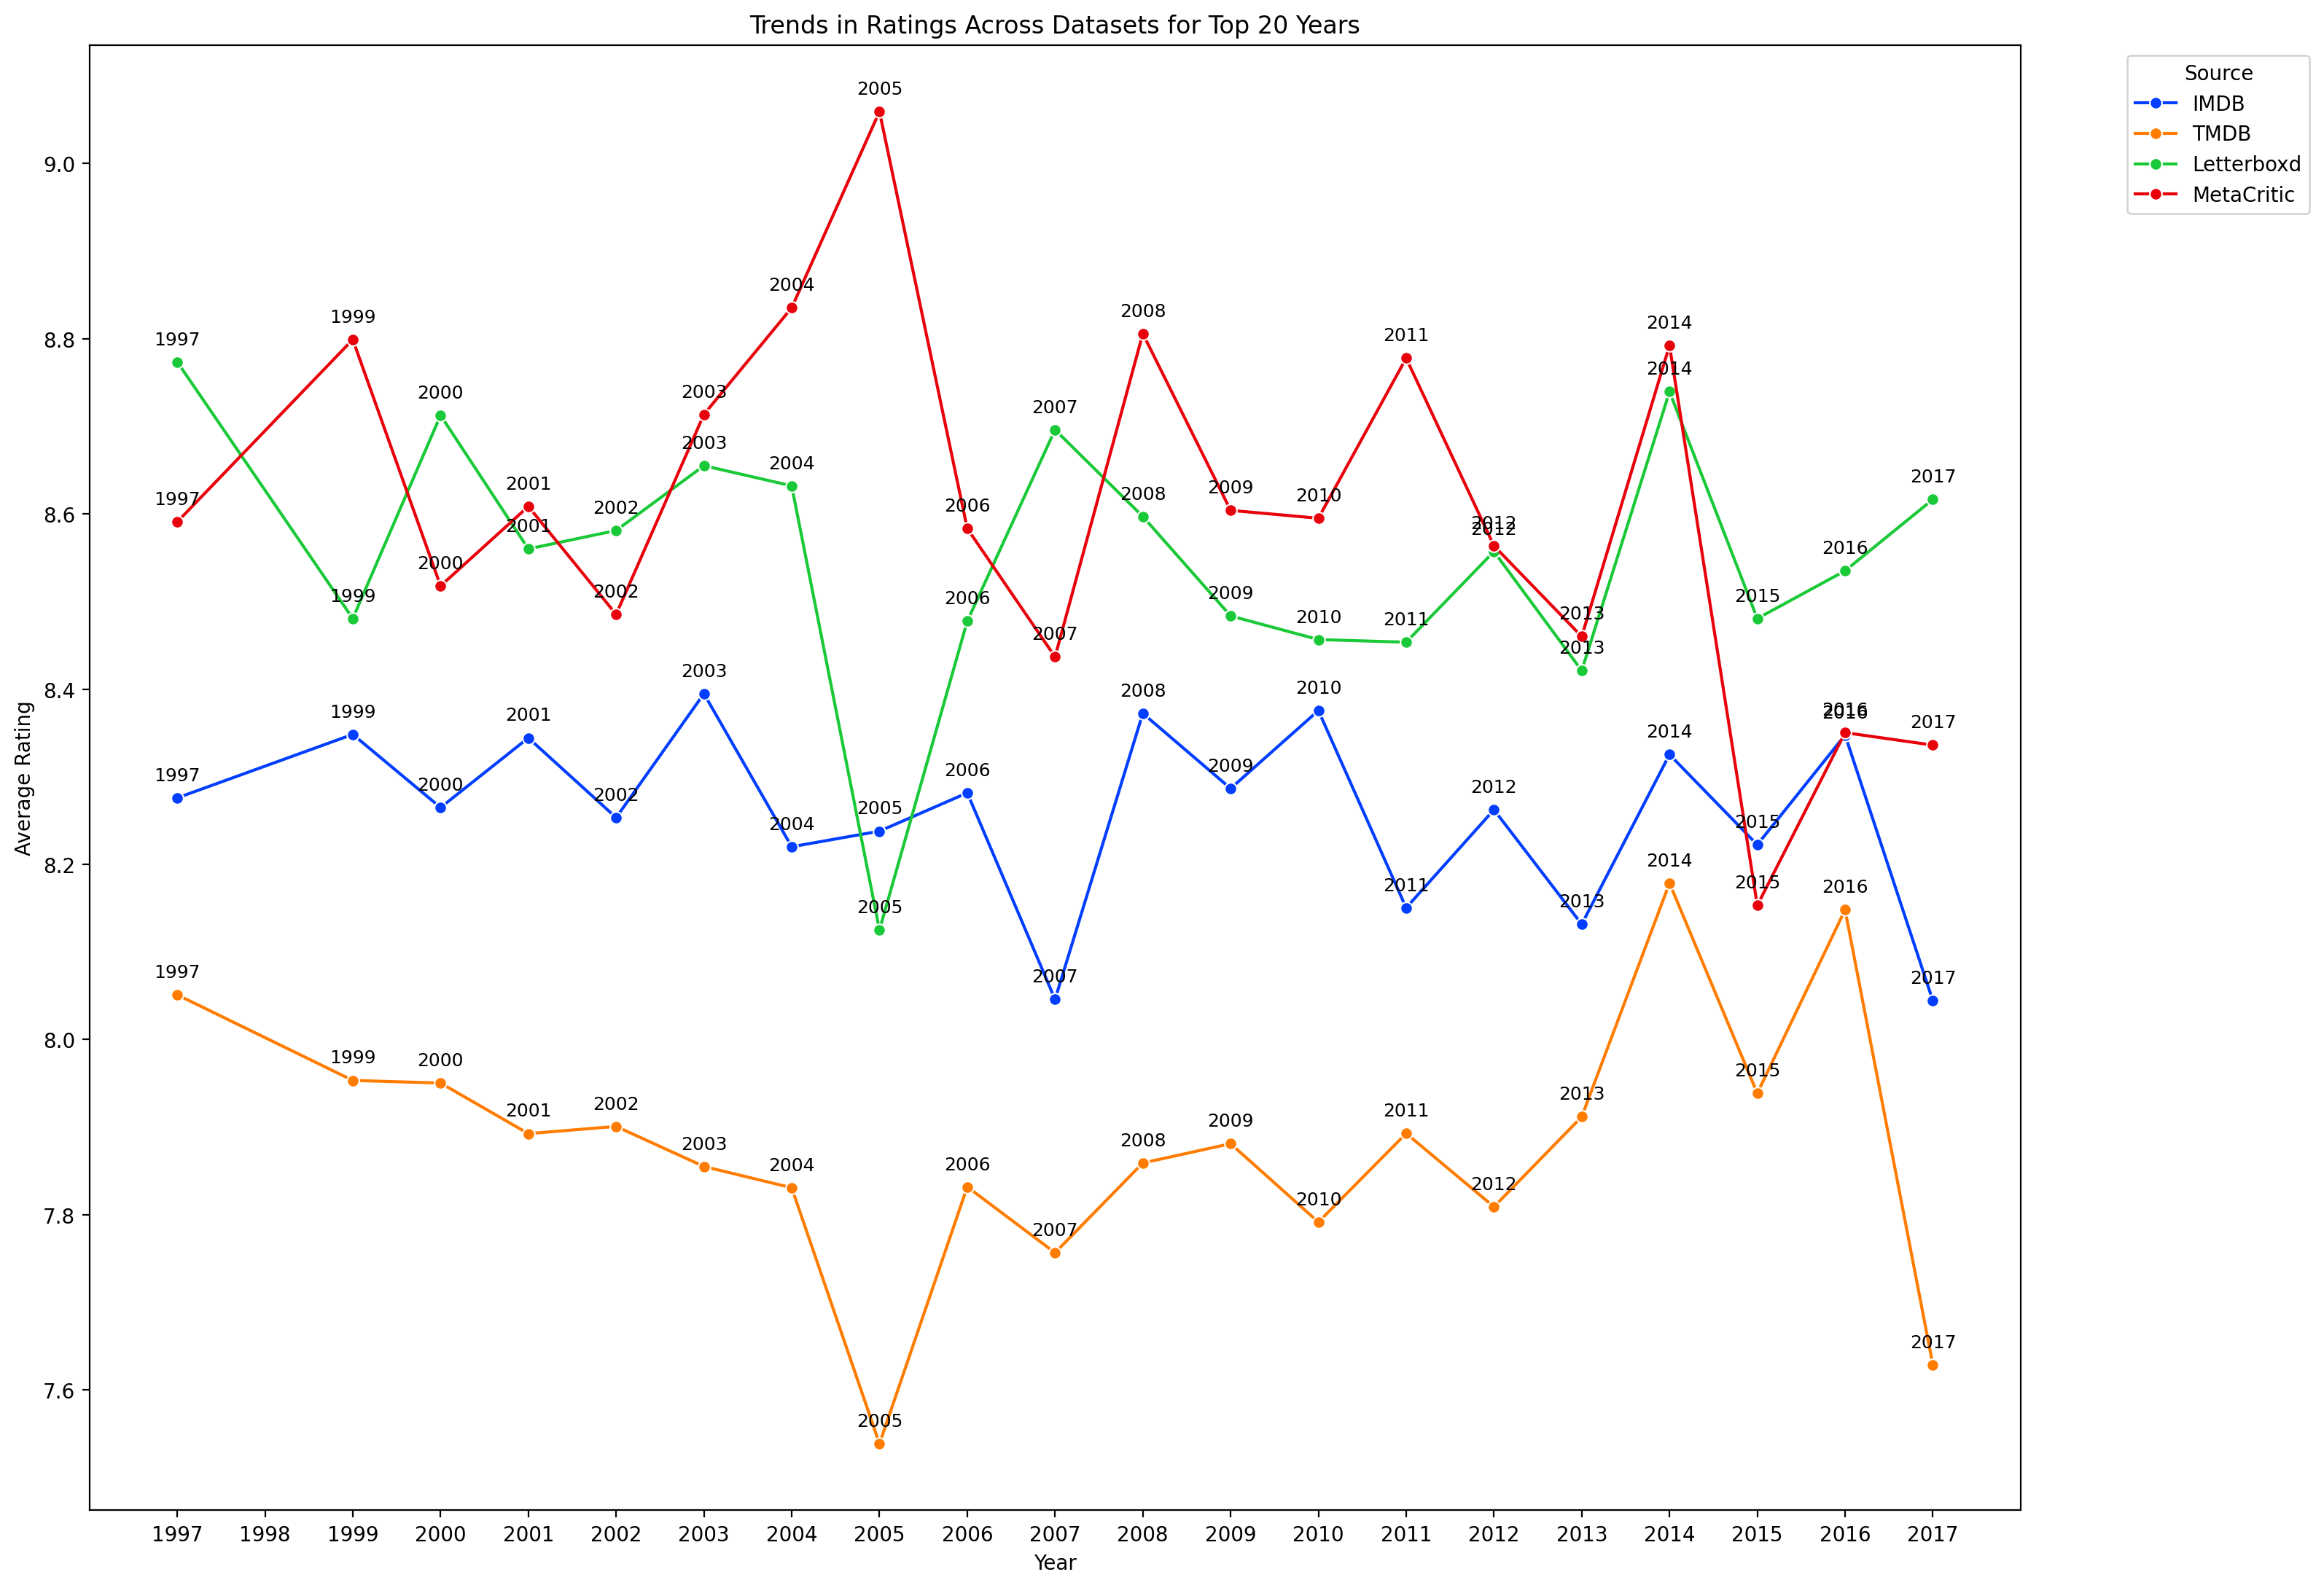

In [2208]:
#first lets see the pattern over the years for the top 20 years across 4 sources
plt.figure(figsize=(16, 11), dpi=200)
sns.set_palette("bright")  
sns.lineplot(data=top_20_combined_df, x='year', y='average_all_4_bins', hue='source', marker='o')

#add years above points
for source in top_20_combined_df['source'].unique():
    subset = top_20_combined_df[top_20_combined_df['source'] == source]
    for _, row in subset.iterrows():
        plt.text(row['year'], row['average_all_4_bins'] + 0.02, str(int(row['year'])), fontsize=9, ha='center')

#set ticks to full years within the range of your data
year_min = int(top_20_combined_df['year'].min())
year_max = int(top_20_combined_df['year'].max())
plt.xticks(np.arange(year_min, year_max + 1, 1))  

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trends in Ratings Across Datasets for Top 20 Years')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('trends_movies_4.png')


/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/1730160295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_combined_df['year'] = top_5_combined_df['year'].astype(int)


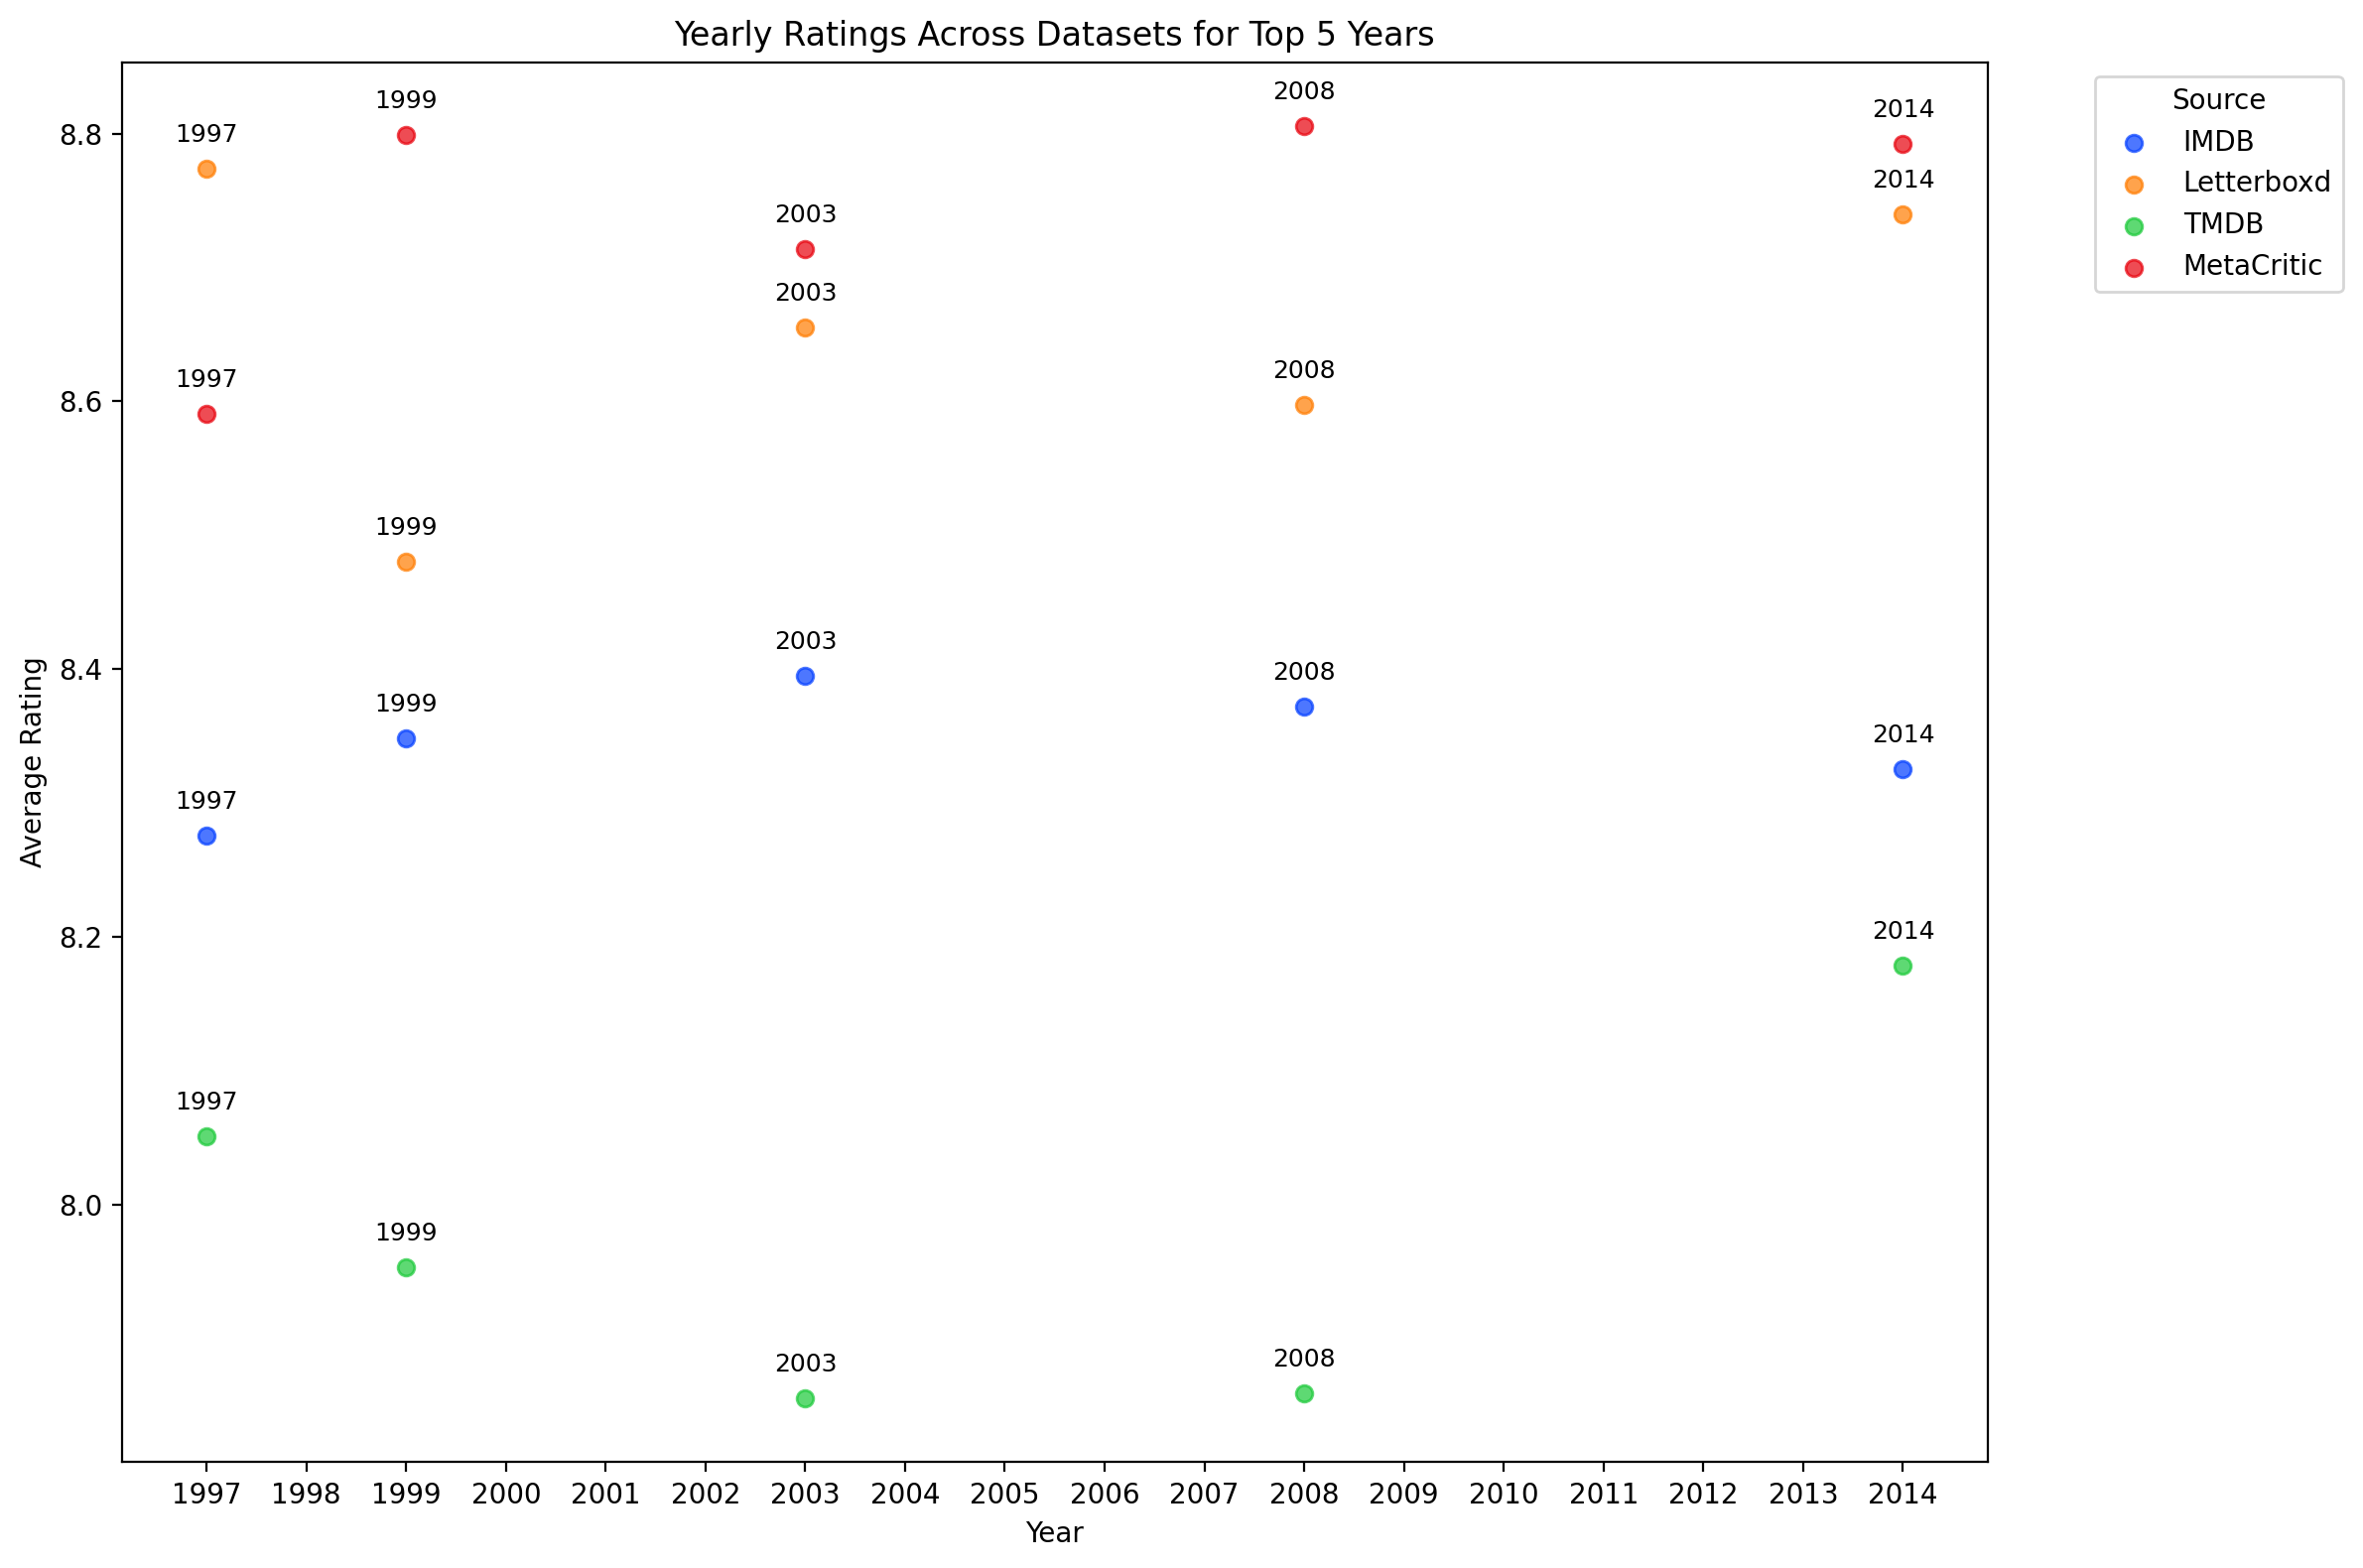

In [238]:
#here we can see scatter plot for the top 5 Years
top_5_years = overall_avg.sort_values('average_all_4_bins', ascending=False).head(5)
top_5_combined_df = all_5_df[all_5_df['year'].isin(top_5_years['year'])]
top_5_combined_df['year'] = top_5_combined_df['year'].astype(int)
top_5_combined_df = top_5_combined_df.sort_values('year')


plt.figure(figsize=(12, 8),dpi=200)
color_palette = sns.color_palette("bright", len(top_5_combined_df['source'].unique()))  
for i, source in enumerate(top_5_combined_df['source'].unique()):
    subset = top_5_combined_df[top_5_combined_df['source'] == source]
    plt.scatter(subset['year'], subset['average_all_4_bins'], label=source, color=color_palette[i], alpha=0.7)
    #write the years above the points
    for _, row in subset.iterrows():
        plt.text(row['year'], row['average_all_4_bins'] + 0.02, str(row['year']), fontsize=9, ha='center') 

#set ticks to full years within the range of your data
year_min = int(top_5_combined_df['year'].min())
year_max = int(top_5_combined_df['year'].max())
plt.xticks(np.arange(year_min, year_max + 1, 1))  

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Yearly Ratings Across Datasets for Top 5 Years')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('splatter_movies_4.png')

In [2128]:
#I am interested in difference between critics and audience for roten tomatoes
#they have a different type of scoring
#The Tomatometer score represents the percentage of professional critic(or audience) reviews that are positive for a given film

We will look at the rotten tomatoes dataset I found on kaggle
https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv

In [254]:
#load the dataset
rotten_df = pd.read_csv('../rotten_tomatoes_movies.csv')
rotten_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [256]:
rotten_df['tomatometer_count'].mean()

57.13980076975323

In [258]:
rotten_df['tomatometer_count'].value_counts().head(10)

tomatometer_count
5.0     793
6.0     728
7.0     666
8.0     595
9.0     532
10.0    477
11.0    435
12.0    433
13.0    387
14.0    345
Name: count, dtype: int64

In [260]:
#lets check the top rated movies by critics first
rotten_df.sort_values('tomatometer_rating',ascending=False)[['movie_title','original_release_date','tomatometer_rating','tomatometer_count','genres']].head(15)

,movie_title,original_release_date,tomatometer_rating,tomatometer_count,genres
16908,Vikings: Journey to New Worlds,2004-09-10,100.0,6.0,Documentary
2021,5B,2019-06-14,100.0,19.0,Documentary
17322,Who the #$&% Is Jackson Pollock?,2006-11-15,100.0,15.0,"Documentary, Musical & Performing Arts, Specia..."
6693,Frankenstein,NaN,100.0,10.0,"Horror, Mystery & Suspense"
12044,Primary,1960-01-01,100.0,6.0,"Documentary, Special Interest"
8727,John Mulaney: The Comeback Kid,NaN,100.0,8.0,"Comedy, Television"
8726,John Mulaney: Kid Gorgeous at Radio City,NaN,100.0,20.0,Comedy
14716,The Chronicle of Anna Magdalena Bach,1968-12-31,100.0,7.0,"Art House & International, Classics, Drama"
875,Fury,1936-05-29,100.0,16.0,"Classics, Drama, Mystery & Suspense"
8722,John Leguizamo's Latin History for Morons,NaN,100.0,7.0,Documentary


In [278]:
#extract from the df the columns we are going to need
critics_tomato = rotten_df.sort_values('tomatometer_rating',ascending=False)[['movie_title','original_release_date','tomatometer_rating','tomatometer_count','genres']]
critics_tomato.fillna('',inplace=True)
critics_tomato['tomatometer_count'].replace('', 0, inplace=True)
critics_tomato['tomatometer_count'] = critics_tomato['tomatometer_count'].astype(int)

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/2657329071.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  critics_tomato.fillna('',inplace=True)
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/2657329071.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  critics_tomato['tomatometer_count'].replace('', 0, inplace=Tr

In [280]:
#lets exclude votes that have less than 20 count,
#again exclude documentaries
critics_tomato = critics_tomato[critics_tomato['tomatometer_count']> 20]
critics_tomato = critics_tomato[~critics_tomato['genres'].str.contains('Documentary')]

In [282]:
#create year from date
critics_tomato['year'] = critics_tomato['original_release_date'].apply(lambda x:x.split('-')[0])

In [284]:
#perform same grouping and sorting per bins

def process_multiple_top_per_year(df, year_col, rating_col, title_col):
    #in this analysis we will always have the same bins
    bins = [3, 5, 7, 10]  
    results = {}

    #like before sort by year and rating
    df_sorted = df.sort_values([year_col, rating_col], ascending=[True, False])

    for top_n in bins:
        #group by year and take the according bin number
        top_per_year = df_sorted.groupby(year_col).head(top_n)

        aggregated = top_per_year.groupby(year_col).agg(
            movies_included_count=(rating_col, 'count'),
            avg_rating=(rating_col, lambda x: round(x.mean(), 3)),
            movie_names=(title_col, lambda x: ','.join(x))
        )

        #filter by minimum movies, example for 3 movie bin its > 2
        min_movies_included = top_n - 1 
        aggregated.reset_index(inplace=True)
        aggregated = aggregated[aggregated['movies_included_count'] > min_movies_included]

        aggregated = aggregated.sort_values('avg_rating', ascending=False)

        #add to dictionary
        results[top_n] = aggregated

    return results
    
#get results for critics rotten
results = process_multiple_top_per_year(
    critics_tomato,
    'year',
    'tomatometer_rating',
    'movie_title'
)

#get results for each bin
critics3 = results[3]
critics5 = results[5]
critics7 = results[7]
critics10 = results[10]

In [286]:
#merge again all 4 buckets and get the average ratings
merged_df = pd.merge(
    critics5.sort_values('avg_rating', ascending=False),
    critics3.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_grouped', '_grouped3')
)
merged_df = pd.merge(
    merged_df,
    critics7.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged1', '_grouped7')
)

merged_all_critics = pd.merge(
    merged_df,
    critics10.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged2', '_grouped10')
)
avg_rating_columns = merged_all_critics.filter(like='avg_rating')
merged_all_critics['average_all_4_bins'] = avg_rating_columns.mean(axis=1)
merged_all_critics[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins
0,,100.00000
3,2018,99.67850
1,1957,99.34650
5,1954,99.28225
9,2014,99.25250


In [288]:
critics_tomato_final = merged_all_critics[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False)

In [290]:
#perform the same for audience
audience_tomato = rotten_df.sort_values('tomatometer_rating',ascending=False)[['movie_title','original_release_date','audience_rating','audience_count','genres']]

In [294]:
audience_tomato.fillna('',inplace=True)
audience_tomato['audience_count'].replace('', 0, inplace=True)
audience_tomato = audience_tomato[audience_tomato['audience_count']> 50000]
audience_tomato = audience_tomato[~audience_tomato['genres'].str.contains('Documentary')]
audience_tomato['year'] = audience_tomato['original_release_date'].apply(lambda x:x.split('-')[0])

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/2476834978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  audience_tomato['audience_count'].replace('', 0, inplace=True)
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/2476834978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [296]:
#perform same grouping and sorting per bins

def process_multiple_top_per_year(df, year_col, rating_col, title_col):
    #in this analysis we will always have the same bins
    bins = [3, 5, 7, 10]  
    results = {}

    #like before sort by year and rating
    df_sorted = df.sort_values([year_col, rating_col], ascending=[True, False])

    for top_n in bins:
        #group by year and take the according bin number
        top_per_year = df_sorted.groupby(year_col).head(top_n)

        aggregated = top_per_year.groupby(year_col).agg(
            movies_included_count=(rating_col, 'count'),
            avg_rating=(rating_col, lambda x: round(x.mean(), 3)),
            movie_names=(title_col, lambda x: ','.join(x))
        )

        #filter by minimum movies, example for 3 movie bin its > 2
        min_movies_included = top_n - 1 
        aggregated.reset_index(inplace=True)
        aggregated = aggregated[aggregated['movies_included_count'] > min_movies_included]

        aggregated = aggregated.sort_values('avg_rating', ascending=False)

        #add to dictionary
        results[top_n] = aggregated

    return results
    
#get results for critics rotten
results = process_multiple_top_per_year(
    audience_tomato,
    'year',
    'audience_rating',
    'movie_title'
)

#get results for each bin
audience3 = results[3]
audience5 = results[5]
audience7 = results[7]
audience10 = results[10]

In [298]:
#merge again all 4 buckets and get the average ratings
merged_df = pd.merge(
    audience5.sort_values('avg_rating', ascending=False),
    audience3.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_grouped', '_grouped3')
)
merged_df = pd.merge(
    merged_df,
    audience7.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged1', '_grouped7')
)

merged_all_audience = pd.merge(
    merged_df,
    audience10.sort_values('avg_rating', ascending=False),
    on='year',
    how='inner',
    suffixes=('_merged2', '_grouped10')
)
avg_rating_columns = merged_all_audience.filter(like='avg_rating')
merged_all_audience['average_all_4_bins'] = avg_rating_columns.mean(axis=1)
merged_all_audience[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins
0,1994,94.71550
1,2002,94.31675
3,1999,93.77025
2,2001,93.28100
5,2004,93.17500


In [300]:
audience_tomato_final = merged_all_audience[['year','average_all_4_bins']].sort_values('average_all_4_bins',ascending=False)

In [302]:
#add source to the dfs
audience_tomato_final = merged_all_audience[['year','average_all_4_bins']]
critics_tomato_final = merged_all_critics[['year','average_all_4_bins']]
audience_tomato_final['source'] = 'Audience Rotten Tomatoes'
critics_tomato_final['source'] = 'Critics Rotten Tomatoes'

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/521305415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audience_tomato_final['source'] = 'Audience Rotten Tomatoes'
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/521305415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critics_tomato_final['source'] = 'Critics Rotten Tomatoes'


In [304]:
#now we should combine all of the merged dfs
all_tomato = [audience_tomato_final,critics_tomato_final,]
all_tomato_df = pd.concat(all_tomato)

In [2146]:
all_tomato_df

,year,average_all_4_bins,source
0,1994,94.71550,Audience Rotten Tomatoes
1,2002,94.31675,Audience Rotten Tomatoes
2,2001,93.28100,Audience Rotten Tomatoes
3,1999,93.77025,Audience Rotten Tomatoes
4,1988,92.67250,Audience Rotten Tomatoes
...,...,...,...
72,1998,94.50250,Critics Rotten Tomatoes
73,1965,93.75600,Critics Rotten Tomatoes
74,1981,93.61325,Critics Rotten Tomatoes
75,2005,93.60100,Critics Rotten Tomatoes


In [306]:
#get count of year per source
year_source_count = all_tomato_df.groupby('year')['source'].nunique().reset_index()
year_source_count.columns = ['year', 'source_count']

#only include years that have both sources
common_years = year_source_count[year_source_count['source_count'] == 2]['year']
tomato_both = all_tomato_df[all_tomato_df['year'].isin(common_years)]

aggregated_tomato = tomato_both.groupby(['year', 'source'])['average_all_4_bins'].mean().reset_index()
overall_avg_tomato = aggregated_tomato.groupby('year')['average_all_4_bins'].mean().reset_index()

In [308]:
#here are the top 5 years according to Rotten Tomatoes combined
overall_avg_tomato.sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins
39,2014,95.481000
24,1999,95.360625
18,1993,95.351125
19,1994,95.345750
20,1995,95.261250


In [2239]:
#here are the top 5 years for critics
critics_tomato_final.sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins,source
2,2018,99.67850,Critics Rotten Tomatoes
1,1957,99.34650,Critics Rotten Tomatoes
3,1954,99.28225,Critics Rotten Tomatoes
8,2014,99.25250,Critics Rotten Tomatoes
6,2019,99.25000,Critics Rotten Tomatoes


In [2241]:
#here are the top 5 years for audiences
audience_tomato_final.sort_values('average_all_4_bins',ascending=False).head(5)

,year,average_all_4_bins,source
0,1994,94.71550,Audience Rotten Tomatoes
1,2002,94.31675,Audience Rotten Tomatoes
3,1999,93.77025,Audience Rotten Tomatoes
2,2001,93.28100,Audience Rotten Tomatoes
5,2004,93.17500,Audience Rotten Tomatoes


/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_43665/1850949086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_combined_df['year'] = top_20_combined_df['year'].astype(int)


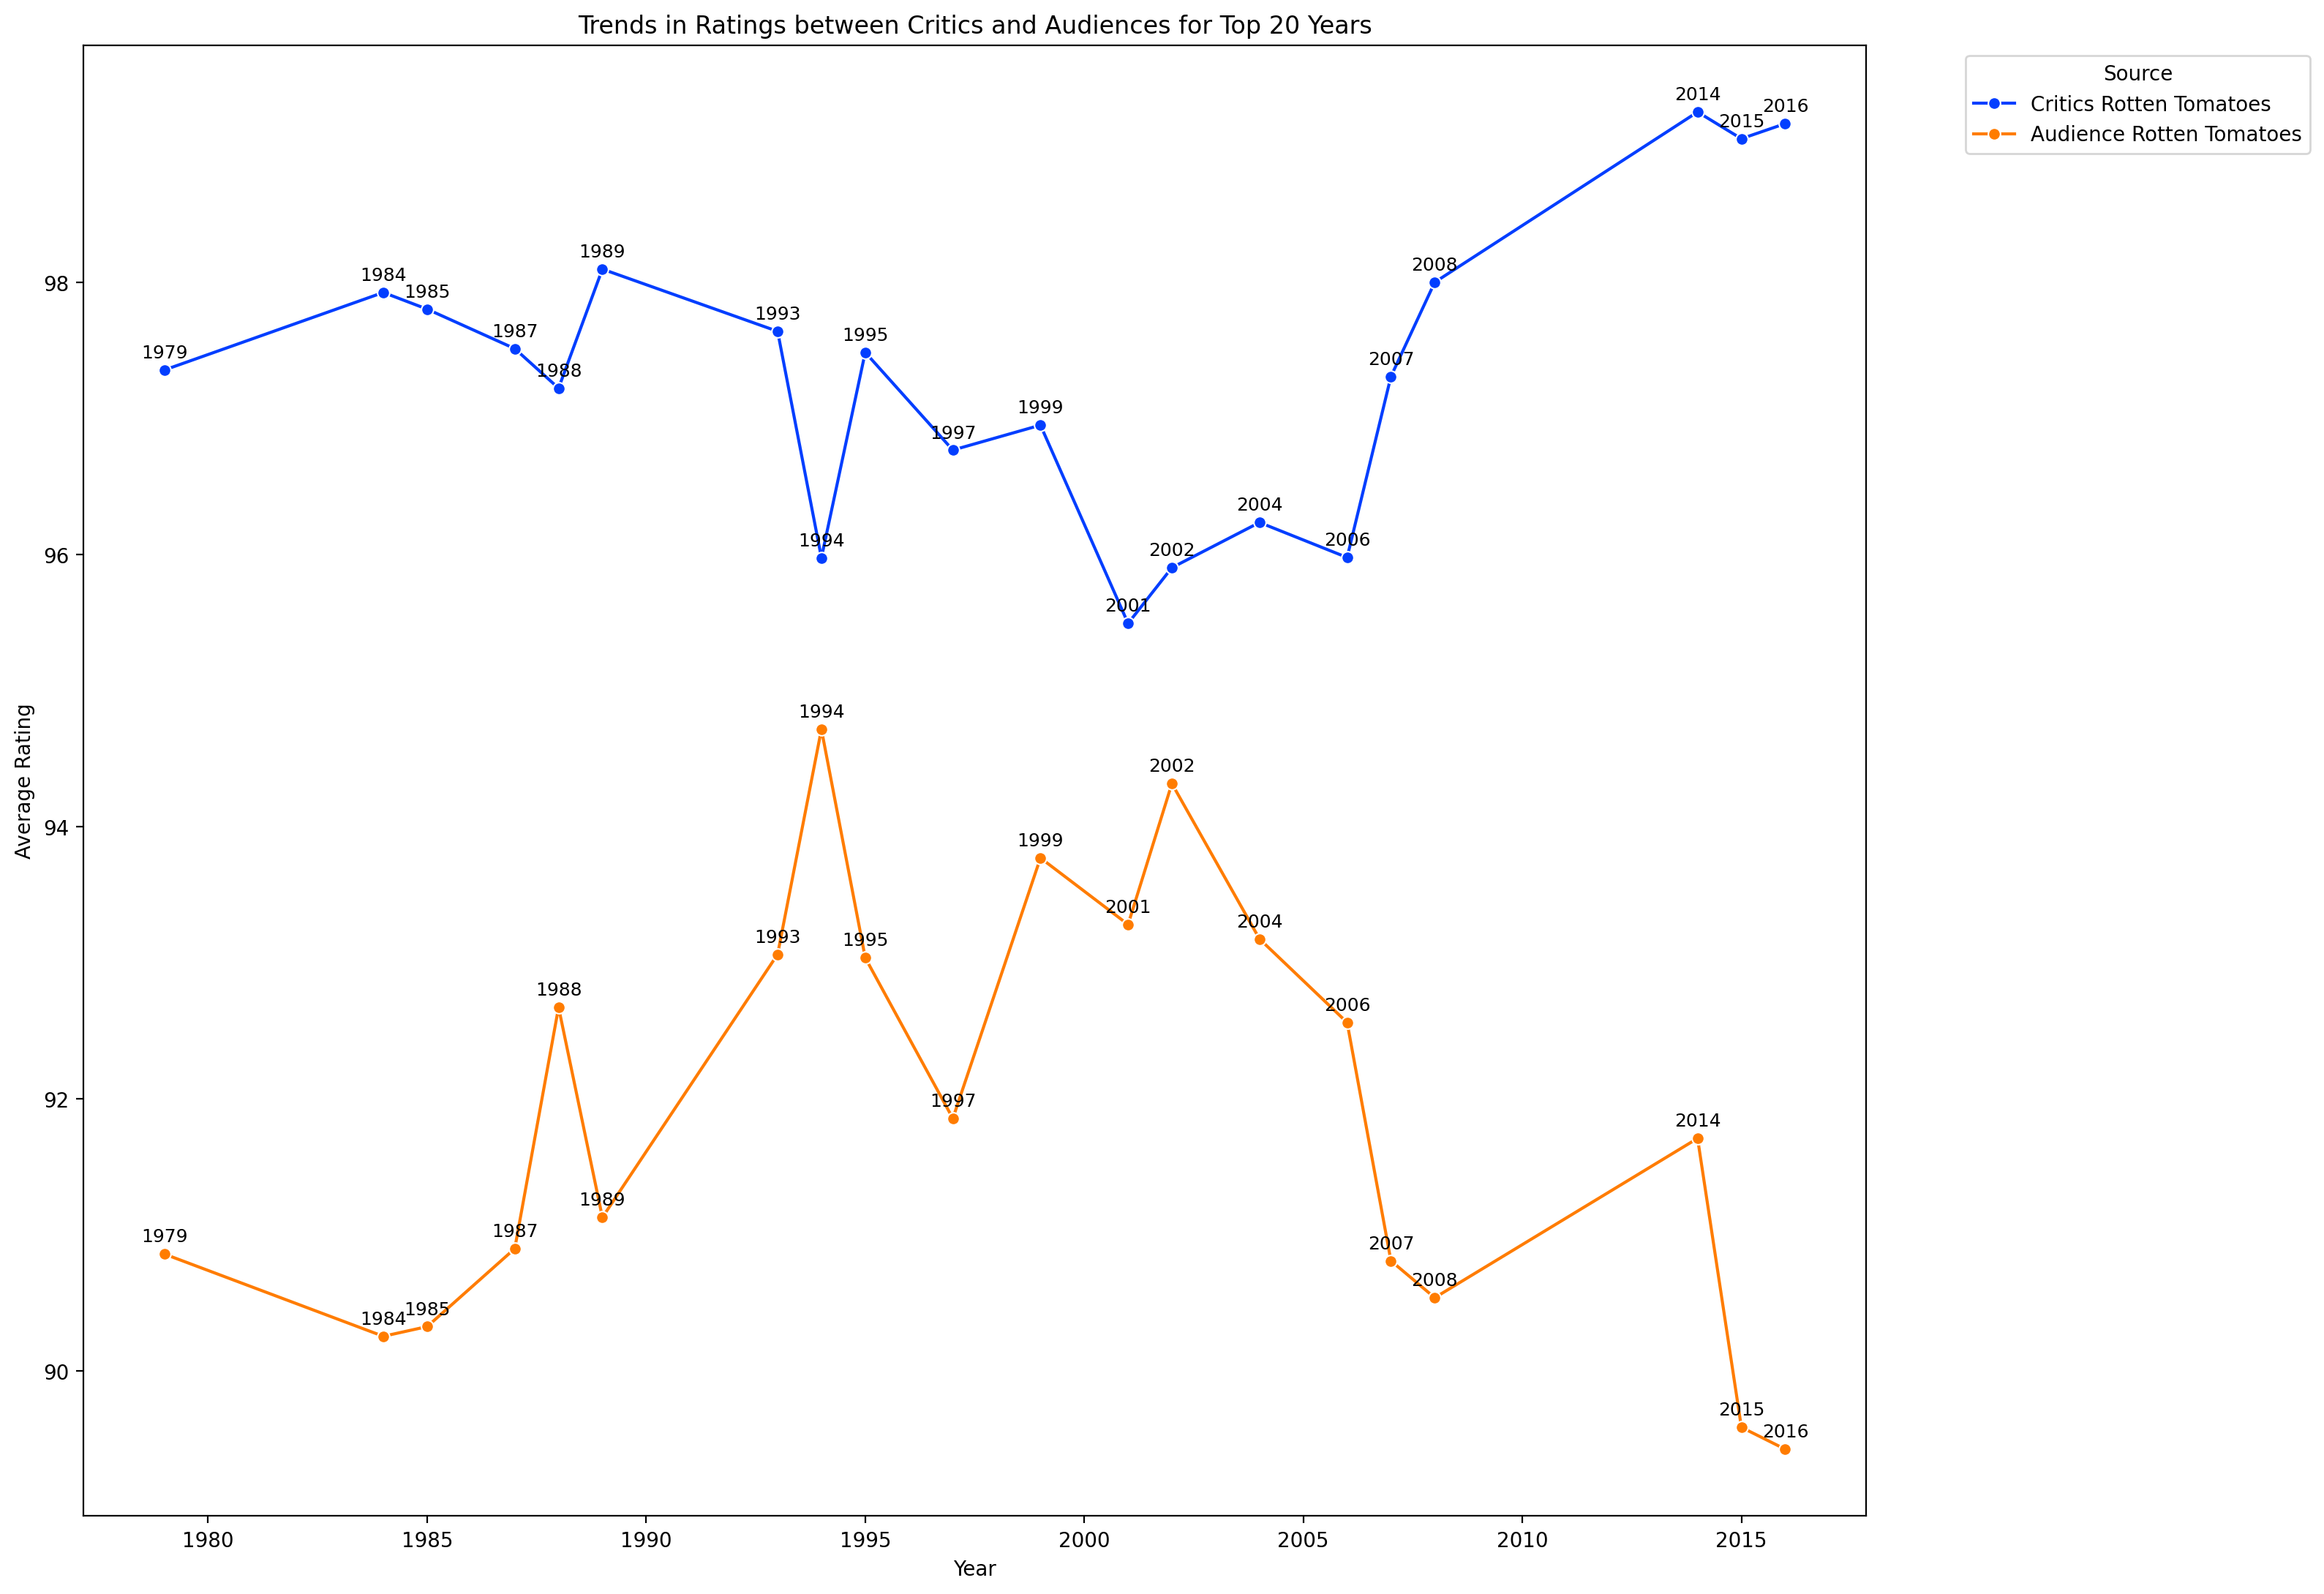

In [2224]:
#lets get the top 20 years and visualize them
top_20_years = overall_avg_tomato.sort_values('average_all_4_bins', ascending=False).head(20)
top_20_combined_df = all_tomato_df[all_tomato_df['year'].isin(top_20_years['year'])]
top_20_combined_df['year'] = top_20_combined_df['year'].astype(int)
top_20_combined_df = top_20_combined_df.sort_values('year')

#first lets see the pattern over the years for the top 20 years across 4 sources
plt.figure(figsize=(16, 11), dpi=200)
sns.set_palette("bright") 
sns.lineplot(data=top_20_combined_df, x='year', y='average_all_4_bins', hue='source', marker='o')

#add years above points
for source in top_20_combined_df['source'].unique():
    subset = top_20_combined_df[top_20_combined_df['source'] == source]
    for _, row in subset.iterrows():
        plt.text(row['year'], row['average_all_4_bins'] + 0.09, str(int(row['year'])), fontsize=9, ha='center')


plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trends in Ratings between Critics and Audiences for Top 20 Years')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('tomato_trends.png')



/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_31502/3310317930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_combined_df['year'] = top_5_combined_df['year'].astype(int)


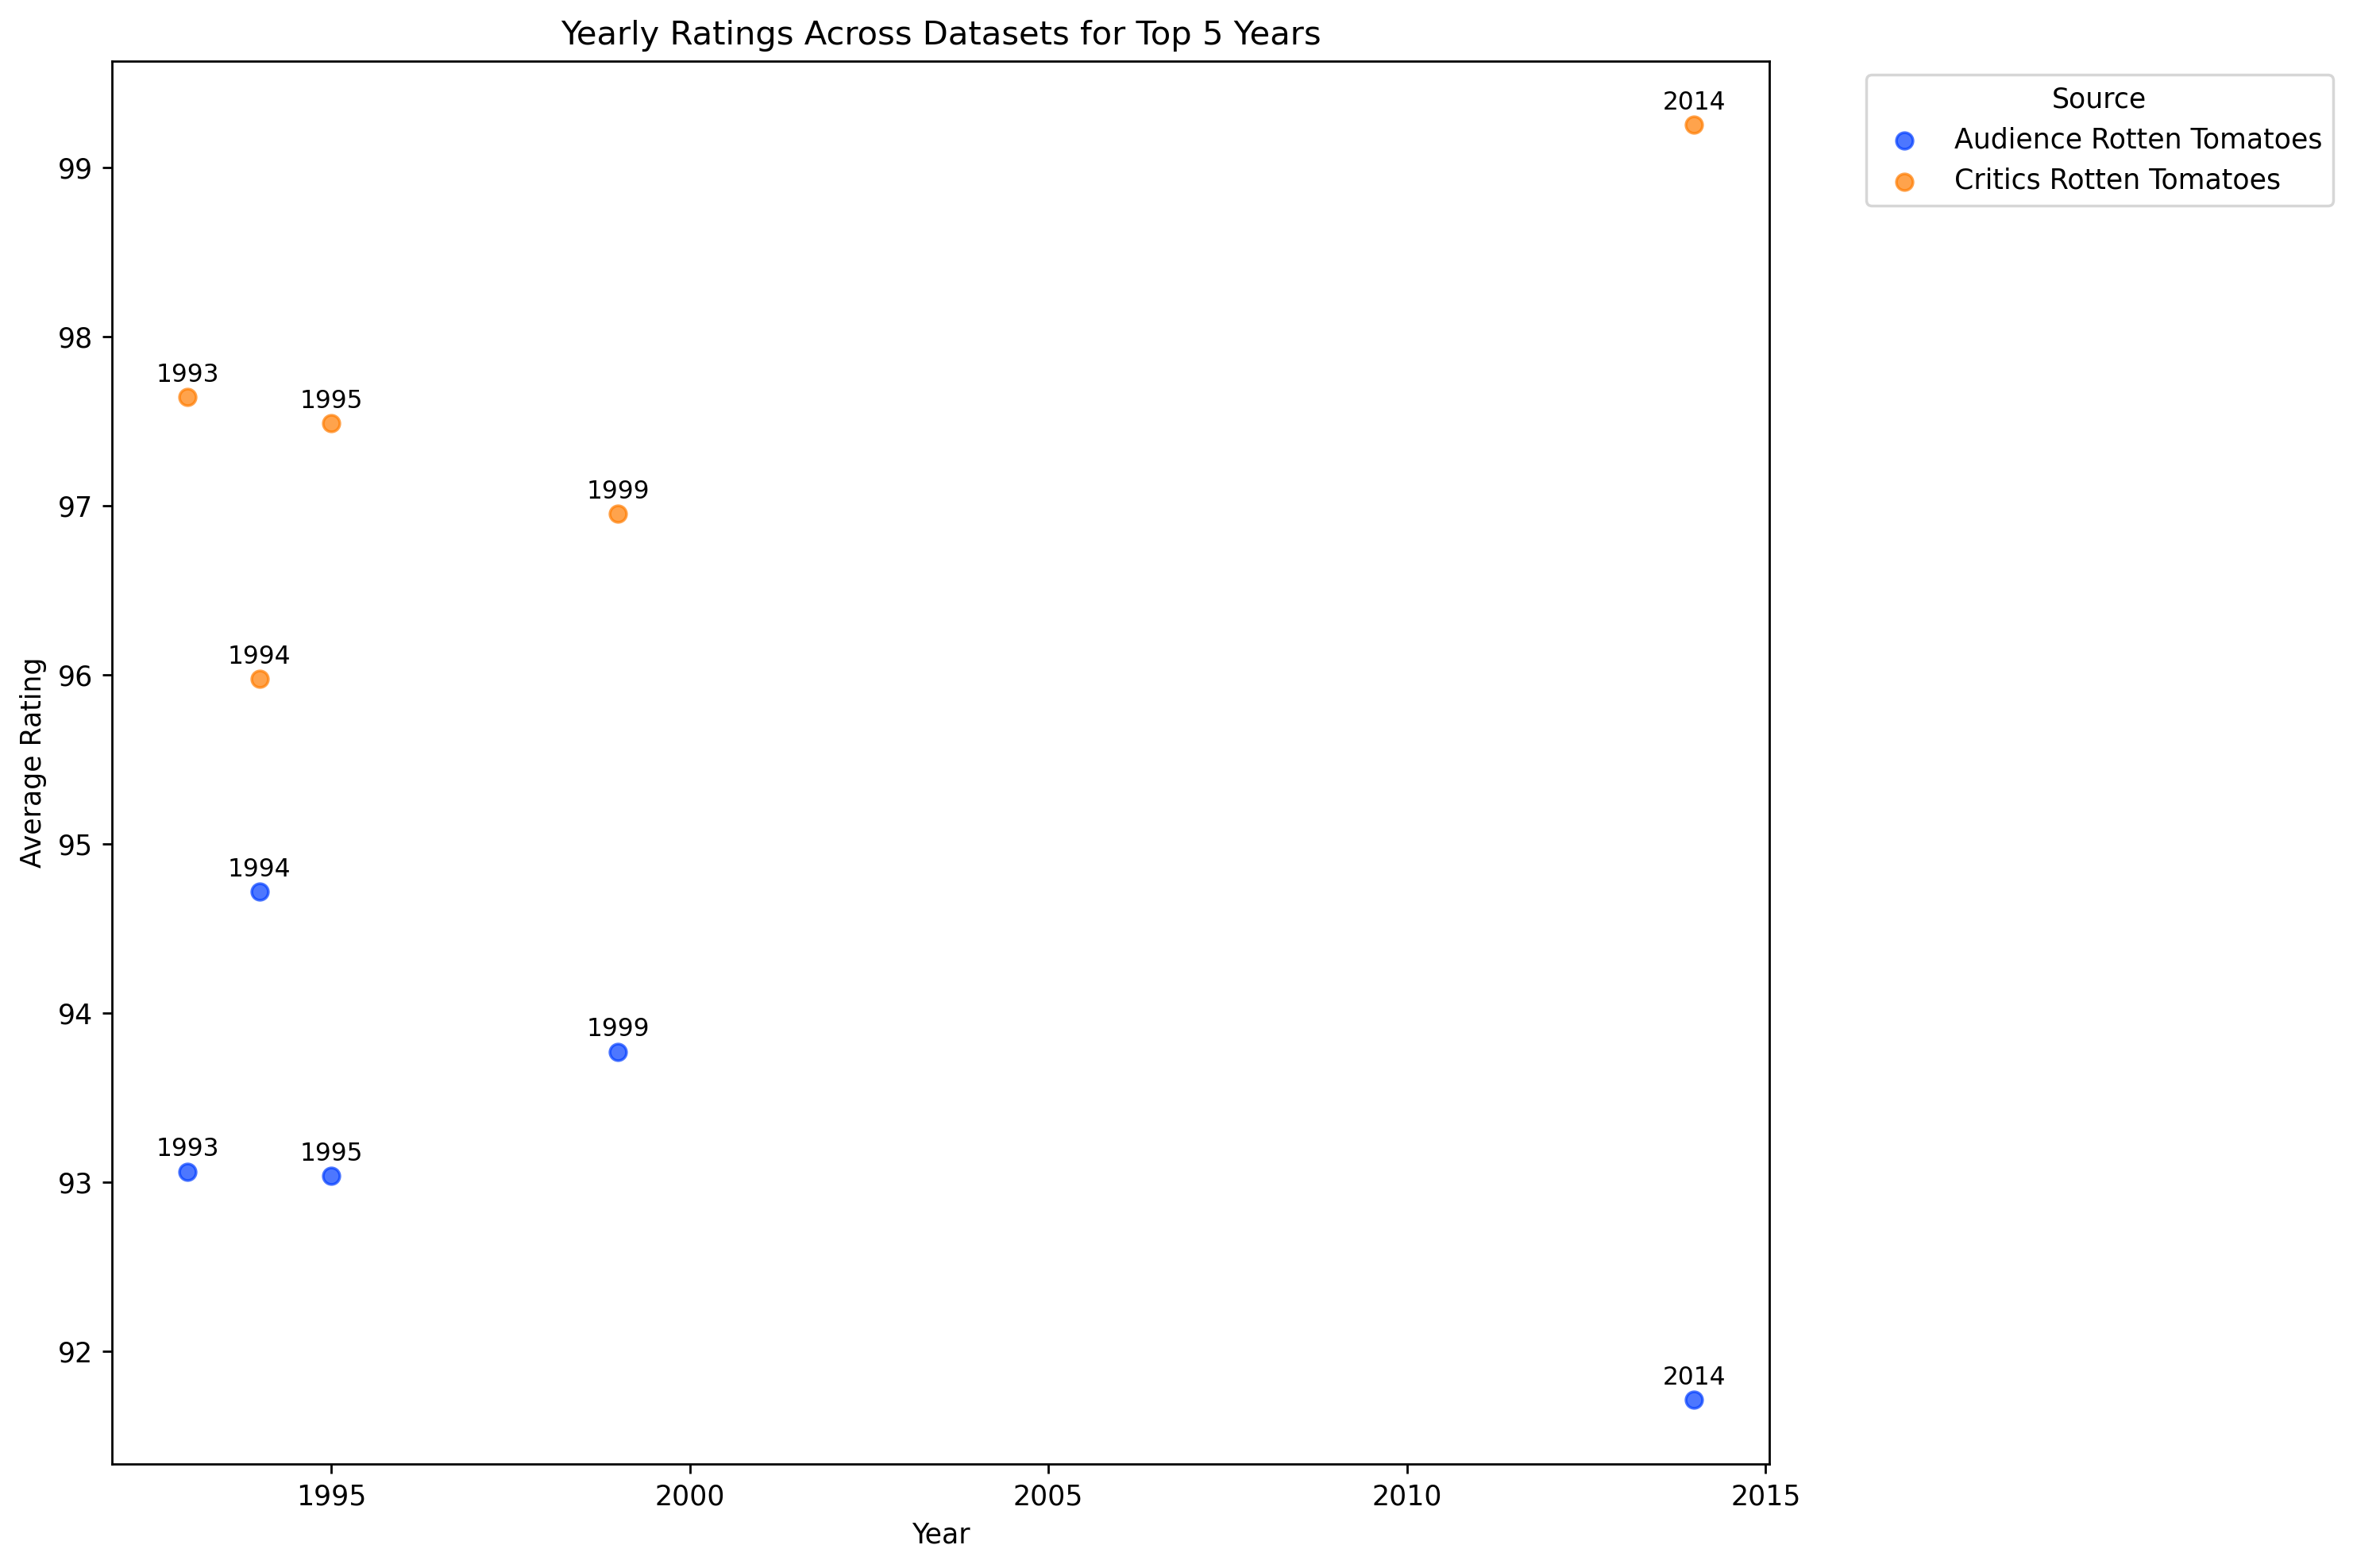

In [310]:
#here we can see splatter plot for the top 5 movies
#first lets include top 5 years
top_5_years = overall_avg_tomato.sort_values('average_all_4_bins', ascending=False).head(5)
top_5_combined_df = all_tomato_df[all_tomato_df['year'].isin(top_5_years['year'])]
top_5_combined_df['year'] = top_5_combined_df['year'].astype(int)
top_5_combined_df = top_5_combined_df.sort_values('year')


plt.figure(figsize=(12, 8),dpi=250)
color_palette = sns.color_palette("bright", len(top_5_combined_df['source'].unique()))  
for i, source in enumerate(top_5_combined_df['source'].unique()):
    subset = top_5_combined_df[top_5_combined_df['source'] == source]
    plt.scatter(subset['year'], subset['average_all_4_bins'], label=source, color=color_palette[i], alpha=0.7)
    #write the years above the points
    for _, row in subset.iterrows():
        plt.text(row['year'], row['average_all_4_bins'] + 0.09, str(row['year']), fontsize=9, ha='center') 


plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Yearly Ratings Across Datasets for Top 5 Years')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('splatter_tomato.png')
